# Replication: Hanganu *et al.*, 2014

## Introduction

This notebook attemps to replicate the following paper with the PPMI dataset:

A. Hanganu et al. <a href=https://academic.oup.com/brain/article/137/4/1120/372146> “Mild cognitive impairment is linked with faster rate of cortical thinning in patients with Parkinson’s disease longitudinally”</a> Brain, vol. 137, no. 4, pp. 1120–1129, 2014.




Abbreviations:

GMV - gray matter volume <br>
HC- healthy controls <br>
MCI - mild cognitive impairement <br>
MoCA - Montreal Cognitive Assessement <br>
PD-MCI - Parkinson's disease with MCI <br>
PD-non-MCI - Parkinson's disease without MCI

This study involved 17 PD-MCI patients, 15 PD-non-MCI patients, and 18 HC. The demografic parameters were as follows (table extracted from the paper):

<img src="images/demographics.png"/>
Table extracted from the paper A. Hanganu et al. <a href=https://academic.oup.com/brain/article/137/4/1120/372146> “Mild cognitive impairment is linked with faster rate of cortical thinning in patients with Parkinson’s disease longitudinally”</a> Brain, vol. 137, no. 4, pp. 1120–1129, 2014.


The main results of the paper can be divided into three sections:
    
   1. **Difference in changes of cortical thickness between groups** 
    
        - **PD-MCI** showed increased rate of overall cortical thinning compared with both PD-non-MCI and HC (Table 2).
        
            - **PD-MCI vs PD-non-MCI**: increased thinning was detected in the right temporal lobe (middle temporal gyrus, transverse temporal gyrus, temporal pole), the right insula, right inferior frontal gyrus and the right supplementary motor area (Figure 1). 
            
            - **PD-MCI vs HC**: increased thinning was again detected in the right temporal lobe and right supplementary motor area. Additional significant clusters included the bilateral precuneus, bi- lateral cuneus, bilateral lingual, as well as right inferior parietal, right lateral occipital and left orbitofrontal region (Figure 1). 
            
            - **PD-non-MCI vs HC**: an increased rate of thinning only in the left lateral occipital and left fusiform regions (Figure 1).
            

        
<img src="images/org_results_figure_1.png"/> 
<img src="images/org_results_table_2.png"/>
Figures extracted from the paper A. Hanganu et al. <a href=https://academic.oup.com/brain/article/137/4/1120/372146> “Mild cognitive impairment is linked with faster rate of cortical thinning in patients with Parkinson’s disease longitudinally”</a> Brain, vol. 137, no. 4, pp. 1120–1129, 2014.

    
   2. **Correlation between change of cortical thickness and MoCA** 
    
        - a positive correlation between rate of change of cortical thickness and MoCA scores was observed when considering all of the patients with Parkinson’s disease (All-PD group), which was driven by the PD-MCI group. Significant clusters were revealed in the temporal lobe bilaterally, the right occipital medial lobe and the left postcentral gyrus. Clusters of negative correlation were revealed in the anterior cingulate region in the All Parkinson’s disease group and in the transverse temporal gyrus in PD-MCI (Figure 2).
        
<img src="images/org_results_figure_2.png"/>
Figure extracted from the paper A. Hanganu et al. <a href=https://academic.oup.com/brain/article/137/4/1120/372146> “Mild cognitive impairment is linked with faster rate of cortical thinning in patients with Parkinson’s disease longitudinally”</a> Brain, vol. 137, no. 4, pp. 1120–1129, 2014.

    
    
   3. **Differences in change of subcortical volume between groups**
    
         - decreased volumes in both Parkinson’s disease groups of the thalamus, caudate nucleus, putamen and hippocampus. 
         
         - a significant decrease in volume of the amygdala and nucleus accumbens was observed in the PD-MCI group vs both PD-non-MCI and HC (Table 2). ## note that this information is not consistent with Table 2. MD-MCI vs PD-non-MCI is significant only for Amyg
    
    
   4. **Correlation between subcortical volume differences and MoCA** 
    
        - a significant correlation between change of cognition over time and change of amygdala volume was identified in the All Parkinson’s disease group, and this was driven by the near-significant result observed in the Parkinson’s disease with MCI group (P = 0.059). Additionally both the Parkinson’s disease with MCI and All Parkinson’s disease groups revealed a correlation between cognition and the volume of the thalamus (Table 3).

<img src="images/org_results_table_3.png"/>
Figure extracted from the paper A. Hanganu et al. <a href=https://academic.oup.com/brain/article/137/4/1120/372146> “Mild cognitive impairment is linked with faster rate of cortical thinning in patients with Parkinson’s disease longitudinally”</a> Brain, vol. 137, no. 4, pp. 1120–1129, 2014.

    

The remainder of this notebook is an attempt to replicate this result using the PPMI dataset.

## Initial setup

<!-- LivingPark notebooks use a *cache* directory to store analysis inputs and outputs. Inputs typically include PPMI Study Data and imaging data whereas outputs include processed images and other derivatives. Cache directories allow LivingPark notebooks to run in a few minutes as they reuse previously computed results. However, cache directories cannot be made public due to the PPMI Data Usage Agreement (DUA). Instead, they are stored on `login.bic.mni.mcgill.ca`, which requires a specific user name and password. In case you don't have access to the cache directory of this notebook, the next sections will download all the required imaging data from PPMI and recompute the results, which will take a few hours depending on your computer configuration. In the future, we will aim at storing this cache dataset on PPMI servers so that they can be accessed with a PPMI account. -->

Let's initialize the notebook directory and software dependencies:

In [1]:
import livingpark_utils

utils = livingpark_utils.LivingParkUtils()
random_seed = 2
utils.notebook_init()

import warnings

warnings.filterwarnings("ignore")

removing link inputs
removing link outputs
This notebook was run on 2023-01-10 18:10:31 UTC +0000


## PPMI cohort preparation

We will build a PPMI cohort that matches the one used in the original study (Table 1) as much as possible. As in other LivingPark replications, we will use the same sample size as the original study. Our cohort will be built directly from PPMI Study Data files so that it can be replicated and updated whenever necessary.

### Study data download

We will start by downloading the PPMI Study Data files required to build our cohort: 
* demographics
* disease duration
* Montreal Cognitive Assessment
* UPDRS
* Hoehn and Yahr score
* primary clinical diagnosis
* cognitive categorization
* medical condition


We will use the LivingPark utils library to download these files from the notebook. If files are already present in the notebook cache, they won't be downloaded again. Otherwise, you will need to enter your PPMI username and password. **In case you don't have a PPMI account, you can request one [here](http://ppmi-info.org).**

In [ ]:
import livingpark_utils
from livingpark_utils import download

utils = livingpark_utils.LivingParkUtils()
downloader = download.ppmi.Downloader(utils.study_files_dir)

required_files = [
    "Demographics.csv",
    "Age_at_visit.csv",
    "Primary_Clinical_Diagnosis.csv",
    "Cognitive_Categorization.csv",
    "Medical_Conditions_Log.csv",
    "Concomitant_Medication_Log.csv",
    "MDS_UPDRS_Part_III.csv",
    "Participant_Status.csv",
    "SocioEconomics.csv",
    "Montreal_Cognitive_Assessment_MoCA.csv",
    "PD_Diagnosis_History.csv",
    "LEDD_Concomitant_Medication_Log.csv",
]

utils.notebook_init()
utils.get_study_files(required_files, default=downloader)

We will also need file `MRI_info.csv` produced by another LivingPark notebook available at https://github.com/LivingPark-MRI/livingpark-utils/blob/main/livingpark_utils/notebooks/mri_metadata.ipynb. This file contains a list of T1-weighted MRIs usable for VBM. 

In [3]:
from livingpark_utils.scripts import mri_metadata

File downloaded
['COR', 'Coronal', 'Cal Head 24', 'Transverse', 'tra_T1_MPRAGE', 'TRA']
['AX', 'axial', 'Phantom']
{'Screening': 'SC', 'Baseline': 'BL', 'Month 12': 'V04', 'Month 24': 'V06', 'Month 36': 'V08', 'Month 48': 'V10', 'Symptomatic Therapy': 'ST', 'Unscheduled Visit 01': 'U01', 'Unscheduled Visit 02': 'U02', 'Premature Withdrawal': 'PW'}
Saved in MRI_info.csv


### Inclusion criteria

To replicate the cohort in the original study, we used the following inclusion and exclusion criteria among PPMI subjects.

1. Early stage of the illness (Hoehn and Yahr I and II stage).

2. T1-weighted MRI available and usable for VBM (see [MRI metadata notebook](https://github.com/LivingPark-MRI/livingpark-utils/blob/main/livingpark_utils/notebooks/mri_metadata.ipynb)).

3. Testing at two timepoints 19.8 +- 2.7 months apart.

4. MRI and MoCA collected 2 +- 4.1 weeks apart.

5. During this evaluation, all patients were OFF medication (at both time points), and did not receive any drugs related to Parkinson’s disease for at least 12h before the sessions.

6. MCI inclusion criteria:
   - (i) objective: performance > 1.5 SD below standardized mean on two or more subtests within a cognitive domain. 
   - (ii)	subjective complaint of cognitive decline.
   - (iii)	absence of significant decline in daily living activities.
   - (iv)	absence of dementia as diagnosed by the evaluating neuropsychologist.
   - (v)	evidence of cognitive abnormalities that cannot be attributed to age.

    Our sample: met PPMI criteria for MCI


7. Control group:  met PPMI criteria for healthy controls

Healthy controls also underwent a neuropsychological assessment and those with MCI were excluded. 


### Exclusion criteria

1. Patients excluded if they have other comorbidities.
2. Cognitively stable patients who converted to MCI at the neuropsychological assessment at Time 2 were excluded.

### Group matching

•	No significant differences were observed between the three groups with respect to sex, age and education. <br>
•	No significant differences existed between the two patients groups with respect to time since diagnosis or disease advancement as measured by the motor part of the Unified Parkinson’s Disease Rating Scale at Time 1.


This notebook was run on 2023-01-10 18:10:56 UTC +0000
File downloaded


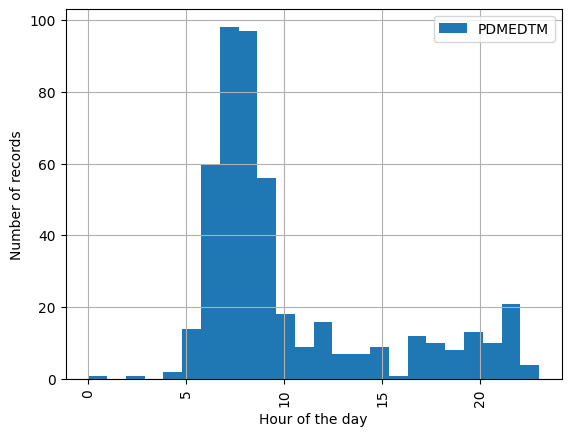

Removed 40 records where PDSTATE=ON and EXAMTM<PDMEDTM
Number of removed records: 5
Found 0 records in Case 3.a
Removed 1 record(s) with missing EXAMTM or PDMEDTM
Cleaned file saved in MDS_UPDRS_Part_III_clean.csv
True


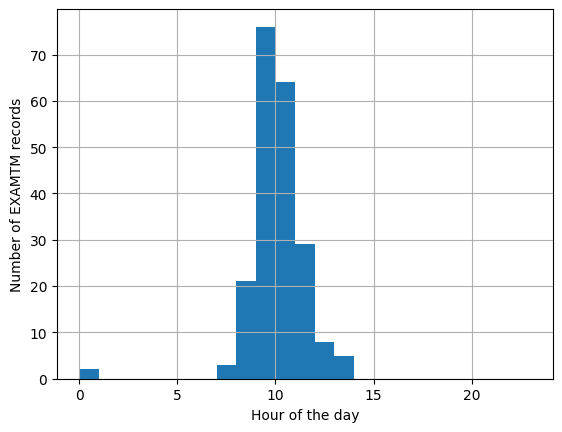

In [4]:
import os
import pandas as pd

# Read data files


# Demographics
dem = pd.read_csv(os.path.join(utils.study_files_dir, "Demographics.csv"))[
    ["PATNO", "SEX", "BIRTHDT"]
]

# Age at visit
age = pd.read_csv(os.path.join(utils.study_files_dir, "Age_at_visit.csv"))[
    ["PATNO", "EVENT_ID", "AGE_AT_VISIT"]
]

# Education
edu = pd.read_csv(os.path.join(utils.study_files_dir, "Socio-Economics.csv"))[
    ["PATNO", "EDUCYRS"]
]

# Diagnosis
diag = pd.read_csv(
    os.path.join(utils.study_files_dir, "Primary_Clinical_Diagnosis.csv")
)[["PATNO", "EVENT_ID", "PRIMDIAG", "OTHNEURO"]]


# Dx status
dx_status = pd.read_csv(os.path.join(utils.study_files_dir, "Participant_Status.csv"))[
    ["PATNO", "COHORT"]
]

# Disease duration / year of diagnosis
# med_cond = pd.read_csv(os.path.join(utils.study_files_dir, "Medical_Conditions_Log.csv"))[
#    ["PATNO", "EVENT_ID", "MHDIAGYR", "MHCAT"]
# ]


# PD dx history / disease duration calc
pd_hist = pd.read_csv(os.path.join(utils.study_files_dir, "PD_Diagnosis_History.csv"))[
    ["PATNO", "EVENT_ID", "PDDXDT"]
]


# Cognitive Categorization
cog_cat = pd.read_csv(
    os.path.join(utils.study_files_dir, "Cognitive_Categorization.csv")
)[["PATNO", "EVENT_ID", "COGSTATE"]]


# Medication
meds = (
    pd.read_csv(os.path.join(utils.study_files_dir, "Concomitant_Medication_Log.csv"))[
        ["PATNO", "EVENT_ID", "SEQNO", "CMTRT"]
    ]
    .groupby(["PATNO", "EVENT_ID"])[["CMTRT"]]
    .aggregate(lambda x: tuple(x))
)  # aggregate all meds in a tuple

# L-Dopa
ldopa = pd.read_csv(
    os.path.join(utils.study_files_dir, "LEDD_Concomitant_Medication_Log.csv")
)[["PATNO", "EVENT_ID", "LEDD"]]

# meds = pd.read_csv(os.path.join(utils.study_files_dir, "Concomitant_Medication_Log.csv"))[
#    ["PATNO", "EVENT_ID", "SEQNO", "CMTRT"]
# ]

# UPDRS and Hoehh Yahr
updrs = pd.read_csv(os.path.join(utils.study_files_dir, "MDS_UPDRS_Part_III.csv"))[
    ["PATNO", "EVENT_ID", "PDSTATE", "NP3TOT", "NHY"]
]

# Clean UPDRS file. Impute missing ON/OFF values.
# It produces MDS_UPDRS_Part_III_clean.csv file
from livingpark_utils.scripts import pd_status

updrs = pd.read_csv(
    os.path.join(utils.study_files_dir, "MDS_UPDRS_Part_III_clean.csv")
)[["PATNO", "EVENT_ID", "PDSTATE", "NP3TOT", "NHY", "PDTRTMNT"]]

# MoCA
moca = pd.read_csv(
    os.path.join(utils.study_files_dir, "Montreal_Cognitive_Assessment__MoCA_.csv")
)[["PATNO", "EVENT_ID", "MCATOT", "INFODT"]]
# MoCA - Use screening instead of baseline.
moca = moca[moca["EVENT_ID"] != "BL"]
moca["EVENT_ID"].mask(moca["EVENT_ID"] == "SC", "BL", inplace=True)

In [5]:
import numpy as np

# Calculate disease duration

from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

pdxhist = pd_hist[(pd_hist["EVENT_ID"] == "SC") & pd_hist["PDDXDT"].notna()]

pd_dur = pd.read_csv(
    os.path.join(utils.study_files_dir, "MDS_UPDRS_Part_III_clean.csv"),
    low_memory=False,
)[["PATNO", "EVENT_ID", "INFODT"]]

PDDXDT_map = dict(zip(pdxhist["PATNO"].values, pdxhist["PDDXDT"].values))
pd_dur["PDDXDT"] = pd_dur["PATNO"].map(PDDXDT_map)

pd_dur["PDXDUR"] = pd_dur.apply(
    lambda row: relativedelta(parse(row["INFODT"]), parse(row["PDDXDT"])).months
    if row["PDDXDT"] is not np.nan
    else np.nan,
    axis=1,
)
pd_dur.drop(labels=["INFODT", "PDDXDT"], inplace=True, axis=1);

In [6]:
# MRI availability

mri = pd.read_csv(os.path.join(utils.study_files_dir, "MRI_info.csv"))
mri["EVENT_ID"] = mri["Visit code"]
mri["PATNO"] = mri["Subject ID"]
mri["Sex"] = mri["Sex"].map({"F": 0, "M": 1})
mri = mri.drop(["Subject ID", "Visit code", "Visit", "Age", "Sex"], axis=1)
mri.groupby("EVENT_ID").size().sort_values(ascending=False).head(5)

EVENT_ID
BL     1231
V10     364
V06     324
V04     289
ST       10
dtype: int64

## Data aggregation

Merge the data into a single dataframe
- MRI scan,
- Demographics (sex, age at visit),
- Education (years of education),
- Diagnosis (primary diagnosis),
- Dx status (cohort),
- Medical condition (year of dx, dx category),
- Cognitive category (cognitive state),
- Medication
- UPDRS (ON/OFF state, UPDRS III total score, Hoehn and Yahr stage)
- MoCA (total score)


In [7]:
# Merge into a single df

df = (
    mri.merge(diag, on=["PATNO", "EVENT_ID"])
    .merge(age, on=["PATNO", "EVENT_ID"], how="left")
    .merge(dem, on=["PATNO"])
    .merge(edu, on=["PATNO"], how="left")
    .merge(dx_status, on=["PATNO"])
    .merge(pd_hist, on=["PATNO", "EVENT_ID"], how="left")
    .merge(cog_cat, on=["PATNO", "EVENT_ID"])
    .merge(meds, on=["PATNO", "EVENT_ID"], how="left")
    .merge(updrs, on=["PATNO", "EVENT_ID"])
    .merge(moca, on=["PATNO", "EVENT_ID"])
    .merge(pd_dur, on=["PATNO", "EVENT_ID"], how="left")
    .drop_duplicates()
    .groupby("PATNO")
    .filter(lambda g: g["EVENT_ID"].nunique() > 1)
)

# Pair visits

In [8]:
# Find visit pairs

from collections import defaultdict

visit2month = {
    "BL": 0,
    "V01": 3,
    "V02": 6,
    "V03": 9,
    "V04": 12,
    "V05": 18,
    "V06": 24,
    "V07": 30,
    "V08": 36,
    "V09": 42,
    "V10": 48,
    "V11": 54,
    "V12": 60,
    "V13": 72,
    "V14": 84,
    "V15": 96,
    "V16": 108,
    "V17": 120,
    "V18": 132,
    "V19": 144,
    "V20": 156,
}


def find_visit_pairs(months: int) -> int:
    """Return the pairs of visits closest to each other, given a target time difference in months."""

    diff = float("inf")
    diff_hist = defaultdict(dict)

    for (k, v), (k_, v_) in combinations(visit2month.items(), 2):
        if (diff_ := abs(abs(v - v_) - months)) <= diff:
            diff = diff_
            diff_hist[diff][k] = k_

    return diff_hist[diff]

In [9]:
def sample_cohort(df, /, *, n):
    _df = df.drop_duplicates(subset=["PATNO"])
    n = min(_df.index.size, n)
    return _df.sample(n=n, replace=False, random_state=1)
    return _df[_df.index.isin(sample)]

# Select healthy controls

In [10]:
# diagnosis - use screening instead of baseline when PRIMDIAG is missing at baseline

diag_bl = diag[diag["EVENT_ID"] == "BL"]
diag_other = diag[diag["EVENT_ID"] != "BL"]
diag_other["EVENT_ID"].mask(diag_other["EVENT_ID"] == "SC", "BL", inplace=True)

diag_hc = pd.concat([diag_bl, diag_other])
diag_hc = diag_hc.drop_duplicates()

In [11]:
# merge into a single df

df_hc = (
    mri.merge(diag_hc, on=["PATNO", "EVENT_ID"])
    .merge(age, on=["PATNO", "EVENT_ID"], how="left")
    .merge(dem, on=["PATNO"], how="left")
    .merge(dx_status, on=["PATNO"])
    .merge(edu, on=["PATNO"], how="left")
    .merge(cog_cat, on=["PATNO", "EVENT_ID"], how="left")
    .merge(moca, on=["PATNO", "EVENT_ID"], how="left")
    .merge(pd_hist, on=["PATNO", "EVENT_ID"], how="left")
    .merge(meds, on=["PATNO", "EVENT_ID"], how="left")
    .merge(updrs, on=["PATNO", "EVENT_ID"], how="left")
    .merge(moca, on=["PATNO", "EVENT_ID"], how="left")
    .merge(pd_dur, on=["PATNO", "EVENT_ID"], how="left")
    .drop_duplicates()
    .groupby("PATNO")
    .filter(lambda g: g["EVENT_ID"].nunique() > 1)
)

In [12]:
# find how many visit pairs are available for HC group

from itertools import combinations

events = ["BL", "V04", "V06", "V08", "V10"]

print("Unique HC subjects per visit pairs:")
for c in combinations(events, 2):
    v0 = set(
        df_hc[
            (df_hc["EVENT_ID"] == c[0])
            & (df_hc["PRIMDIAG"] == 17)
            & (df_hc["COHORT"] == 2)
        ]["PATNO"].values
    )
    v1 = set(
        df_hc[
            (df_hc["EVENT_ID"] == c[1])
            & (df_hc["PRIMDIAG"] == 17)
            & (df_hc["COHORT"] == 2)
        ]["PATNO"].values
    )
    if len(v0 & v1):
        print(
            f"{c[0]:3} & {c[1]:3} = {len(v0 & v1):>3}"
            f" | Month difference: {visit2month[c[1]] - visit2month[c[0]]}"
        )
#       print(v0 & v1)

Unique HC subjects per visit pairs:
BL  & V04 =  62 | Month difference: 12
BL  & V06 =   9 | Month difference: 24
BL  & V08 =   2 | Month difference: 36
BL  & V10 =  11 | Month difference: 48
V04 & V06 =   8 | Month difference: 12
V04 & V08 =   1 | Month difference: 24
V04 & V10 =  10 | Month difference: 36
V06 & V08 =   2 | Month difference: 12
V06 & V10 =   2 | Month difference: 24


In [13]:
def pairs_hc(arg):

    visit_pairs = find_visit_pairs(arg)
    visit_df = df_hc.copy()
    visit_df["NEXT_VISIT"] = visit_df["EVENT_ID"].map(visit_pairs)

    visit_df = visit_df.merge(
        visit_df.drop(
            ["AGE_AT_VISIT", "SEX", "NEXT_VISIT", "EDUCYRS"],
            axis=1,
        ),
        left_on=[
            "PATNO",
            "NEXT_VISIT",
        ],
        right_on=[
            "PATNO",
            "EVENT_ID",
        ],
        suffixes=(None, "_NX"),
    ).drop_duplicates()

    return visit_df.loc[
        (visit_df["PRIMDIAG"] == 17)
        & (visit_df["COHORT"] == 2)
        & (visit_df["PRIMDIAG_NX"] == 17)
        & (visit_df["COHORT_NX"] == 2)
    ]

In [14]:
# build database of all available HC
hc_12 = pairs_hc(12)
hc_24 = pairs_hc(24)
hc = pd.concat([hc_12, hc_24], ignore_index=True)
hc = hc.drop_duplicates(subset=["PATNO"])
print("Unique HC number before selection: ", hc["PATNO"].unique().size)

# select 18 HC patients

hc = hc.sample(n=18, random_state=3)
hc["dx_group"] = "HC"
print(len(hc), "HC subjects were randomly selected")

Unique HC number before selection:  67
18 HC subjects were randomly selected


## Data aggregation for PD

Merge the data into a single dataframe
- MRI scan,
- Demographics (sex, age at visit),
- Education (years of education),
- Diagnosis (primary diagnosis),
- Dx status (cohort),
- Medical condition (year of dx, dx category),
- Cognitive category (cognitive state),
- Medication
- UPDRS (ON/OFF state, UPDRS III total score, Hoehn and Yahr stage)
- MoCA (total score)


In [15]:
# Merge into a single df for PD

df = (
    mri.merge(diag, on=["PATNO", "EVENT_ID"])
    .merge(age, on=["PATNO", "EVENT_ID"], how="left")
    .merge(dem, on=["PATNO"])
    .merge(edu, on=["PATNO"], how="left")
    .merge(dx_status, on=["PATNO"])
    .merge(pd_hist, on=["PATNO", "EVENT_ID"], how="left")
    .merge(cog_cat, on=["PATNO", "EVENT_ID"])
    .merge(meds, on=["PATNO", "EVENT_ID"], how="left")
    .merge(updrs, on=["PATNO", "EVENT_ID"])
    .merge(moca, on=["PATNO", "EVENT_ID"])
    .merge(pd_dur, on=["PATNO", "EVENT_ID"], how="left")
    .drop_duplicates()
    .groupby("PATNO")
    .filter(lambda g: g["EVENT_ID"].nunique() > 1)
)

## Number of available visit pairs - PD meeting all the criteria

In [16]:
# Pair PD-non-MCI
# Include Primdiag 1 & Cogstate 1 & Cohort 1 & [NHY 1 | 2] & MoCA & no comorb & UPDRS OFF

from itertools import combinations

events = ["BL", "V04", "V06", "V08", "V10"]

print("Unique PD-non-MCI subjects per visit pairs:")
for c in combinations(events, 2):
    v0 = set(
        df[
            (df["EVENT_ID"] == c[0])
            & (df["PRIMDIAG"] == 1)
            & (df["COGSTATE"] == 1)
            & (df["COHORT"] == 1)
            & df["NHY"].isin(["1", "2"])
            & (df["MCATOT"].notnull())
            & (df["OTHNEURO"].isnull())
            & (df["PDSTATE"] == "OFF")
        ]["PATNO"].values
    )
    v1 = set(
        df[
            (df["EVENT_ID"] == c[1])
            & (df["PRIMDIAG"] == 1)
            & (df["COGSTATE"] == 1)
            & (df["COHORT"] == 1)
            & df["NHY"].isin(["1", "2"])
            & (df["MCATOT"].notnull())
            & (df["OTHNEURO"].isnull())
            & (df["PDSTATE"] == "OFF")
        ]["PATNO"].values
    )
    if len(v0 & v1):
        print(
            f"{c[0]:3} & {c[1]:3} = {len(v0 & v1):>3}"
            f" | Month difference: {visit2month[c[1]] - visit2month[c[0]]}"
        )

Unique PD-non-MCI subjects per visit pairs:
BL  & V04 =  12 | Month difference: 12
V04 & V06 =  22 | Month difference: 12
V04 & V10 =  24 | Month difference: 36
V06 & V10 =  31 | Month difference: 24


In [17]:
# TEMP DELETE

# omit mca
# Pair PD-MCI
# Include Primdiag 1 & Cogstate 1 & Cohort 1 & [NHY 1 | 2] & MoCA & no comorb & UPDRS OFF

from itertools import combinations

events = ["BL", "V04", "V06", "V08", "V10"]

print("Unique PD-MCI subjects per visit pairs:")
for c in combinations(events, 2):
    v0 = set(
        df[
            (df["EVENT_ID"] == c[0])
            & (df["PRIMDIAG"] == 1)
            & (df["COGSTATE"] == 2)
            & (df["COHORT"] == 1)
            & df["NHY"].isin(["1", "2"])
            & (df["MCATOT"].notnull())
            & (df["OTHNEURO"].isnull())
            # & (df["PDSTATE"] == "OFF")
        ]["PATNO"].values
    )
    v1 = set(
        df[
            (df["EVENT_ID"] == c[1])
            & (df["PRIMDIAG"] == 1)
            & (df["COGSTATE"] == 2)
            & (df["COHORT"] == 1)
            & df["NHY"].isin(["1", "2"])
            & (df["MCATOT"].notnull())
            # & (df["PDSTATE"] == "OFF")
        ]["PATNO"].values
    )
    if len(v0 & v1):
        print(
            f"{c[0]:3} & {c[1]:3} = {len(v0 & v1):>3}"
            f" | Month difference: {visit2month[c[1]] - visit2month[c[0]]}"
        )
        #print(v0 & v1)

Unique PD-MCI subjects per visit pairs:
V04 & V06 =   6 | Month difference: 12
V04 & V10 =   6 | Month difference: 36
V06 & V10 =  13 | Month difference: 24


In [18]:
# Pair PD-MCI
# Include Primdiag 1 & Cogstate 1 & Cohort 1 & [NHY 1 | 2] & MoCA & no comorb & UPDRS OFF

from itertools import combinations

events = ["BL", "V04", "V06", "V08", "V10"]

print("Unique PD-MCI subjects per visit pairs:")
for c in combinations(events, 2):
    v0 = set(
        df[
            (df["EVENT_ID"] == c[0])
            & (df["PRIMDIAG"] == 1)
            & (df["COGSTATE"] == 2)
            & (df["COHORT"] == 1)
            & df["NHY"].isin(["1", "2"])
            & (df["MCATOT"].notnull())
            & (df["OTHNEURO"].isnull())
            & (df["PDSTATE"] == "OFF")
        ]["PATNO"].values
    )
    v1 = set(
        df[
            (df["EVENT_ID"] == c[1])
            & (df["PRIMDIAG"] == 1)
            & (df["COGSTATE"] == 2)
            & (df["COHORT"] == 1)
            & df["NHY"].isin(["1", "2"])
            & (df["MCATOT"].notnull())
            & (df["OTHNEURO"].isnull())
            & (df["PDSTATE"] == "OFF")
        ]["PATNO"].values
    )
    if len(v0 & v1):
        print(
            f"{c[0]:3} & {c[1]:3} = {len(v0 & v1):>3}"
            f" | Month difference: {visit2month[c[1]] - visit2month[c[0]]}"
        )
        # print(v0 & v1)

Unique PD-MCI subjects per visit pairs:
V04 & V06 =   1 | Month difference: 12
V04 & V10 =   2 | Month difference: 36
V06 & V10 =   5 | Month difference: 24


# Select PD-MCI patients

This script has been written with a prior knowledge that there are less PD-MCI patients who meet the inclusion criteria than PD-non-MCI patients in PPMI.

In [19]:
def pairs_mci(arg):

    visit_pairs = find_visit_pairs(arg)
    visit_df = df.copy()
    visit_df["NEXT_VISIT"] = visit_df["EVENT_ID"].map(visit_pairs)

    visit_df = visit_df.merge(
        visit_df.drop(
            ["AGE_AT_VISIT", "SEX", "NEXT_VISIT", "EDUCYRS"],
            axis=1,
        ),
        left_on=[
            "PATNO",
            "NEXT_VISIT",
        ],
        right_on=[
            "PATNO",
            "EVENT_ID",
        ],
        suffixes=(None, "_NX"),
    ).drop_duplicates()

    return visit_df.loc[
        (visit_df["COGSTATE"] == 2)
        & (visit_df["PRIMDIAG"] == 1)
        & (visit_df["COHORT"] == 1)
        & visit_df["NHY"].isin(["1", "2"])
        & (visit_df["MCATOT"].notnull())
        & (visit_df["OTHNEURO"].isnull())
        & (visit_df["PDSTATE"] == "OFF")
        & (visit_df["COGSTATE_NX"] == 2)
        & (visit_df["PRIMDIAG_NX"] == 1)
        & (visit_df["COHORT_NX"] == 1)
        & visit_df["NHY_NX"].isin(["1", "2"])
        & (visit_df["MCATOT_NX"].notnull())
        & (visit_df["OTHNEURO_NX"].isnull())
        & (visit_df["PDSTATE_NX"] == "OFF")
    ]

In [20]:
mci = pairs_mci(12)
mci = mci.drop_duplicates(subset=["PATNO"])

if len(mci) > 16:
    print("There is enough PD-MCI patients. ", len(mci), " PD-MCI patients found")
else:
    mci_24 = pairs_mci(24)
    mci = pd.concat([mci, mci_24], ignore_index=True)
    mci = mci.drop_duplicates(subset=["PATNO"])

    if len(mci) > 16:
        print("There is enough PD-MCI patients. ", len(mci), " PD-MCI patients found")
    else:
        mci_36 = pairs_mci(36)
        mci = pd.concat([mci, mci_36], ignore_index=True)
        mci = mci.drop_duplicates(subset=["PATNO"])
        print("The final PD-MCI sample size is ", len(mci), " patients.")

mci["dx_group"] = "PD-MCI"

The final PD-MCI sample size is  8  patients.


# Select PD-non-MCI patients

All available pairs for PD-non-MCI patients are selected in this step. They will be matched to a smaller PD-MCI cohort

In [21]:
def pairs_nonmci(arg):

    visit_pairs = find_visit_pairs(arg)
    visit_df = df.copy()
    visit_df["NEXT_VISIT"] = visit_df["EVENT_ID"].map(visit_pairs)

    visit_df = visit_df.merge(
        visit_df.drop(
            ["AGE_AT_VISIT", "SEX", "NEXT_VISIT", "EDUCYRS"],
            axis=1,
        ),
        left_on=[
            "PATNO",
            "NEXT_VISIT",
        ],
        right_on=[
            "PATNO",
            "EVENT_ID",
        ],
        suffixes=(None, "_NX"),
    ).drop_duplicates()

    return visit_df.loc[
        (visit_df["COGSTATE"] == 1)
        & (visit_df["PRIMDIAG"] == 1)
        & (visit_df["COHORT"] == 1)
        & visit_df["NHY"].isin(["1", "2"])
        & (visit_df["MCATOT"].notnull())
        & (visit_df["OTHNEURO"].isnull())
        & (visit_df["PDSTATE"] == "OFF")
        & (visit_df["COGSTATE_NX"] == 1)
        & (visit_df["PRIMDIAG_NX"] == 1)
        & (visit_df["COHORT_NX"] == 1)
        & visit_df["NHY_NX"].isin(["1", "2"])
        & (visit_df["MCATOT_NX"].notnull())
        & (visit_df["OTHNEURO_NX"].isnull())
        & (visit_df["PDSTATE_NX"] == "OFF")
    ]

In [22]:
wo_mci_12 = pairs_nonmci(12)
wo_mci_24 = pairs_nonmci(24)
wo_mci_all = pd.concat([wo_mci_12, wo_mci_24], ignore_index=True)
wo_mci_all = wo_mci_all.drop_duplicates(subset=["PATNO"])

print("There are ", len(wo_mci_all), " PD-non-MCI patients to match PD-MCI group.")

There are  53  PD-non-MCI patients to match PD-MCI group.


# Group matching

Match PD-non-MCI sample to the smaller PD-MCI cohort

We implemented a nearest-neighbor matching loop based on the Euclidean distance. 
We will match PD-MCI and PD-non-MCI groups for age, sex, education, UPDRS, and MoCA.

In [23]:
def nn(x, df, matched_vars):
    """
    Find index of nearest neighbor of x in df
    """

    # Select subjects
    df_match = df

    # Compute squared distance between x and all elements in df, using normalized variables
    df_match["dist"] = sum(
        (df_match[f"{var}"] - x[f"{var}"].values[0]) ** 2 for var in matched_vars
    )

    # Return the element in df with the smallest distance
    df_match.sort_values("dist", inplace=True)
    return df_match.head(
        1
    )  ## there's probably a better way to do it but it should work


def match(n, group1_df, group2_df, matched_vars):
    """
    Randomly pick n elements in group1_df, then find n matching elements in group2_df.
    Ensure that each group only contains 1 or less element from each patient and that
    no patient has elements in both groups.
    """

    from numpy.random import choice, seed

    # Select n random patients in group1
    group1_patnos = sorted(pd.unique(group1_df["PATNO"]))
    seed(0)  # change this to bootstrap population
    group1_patnos_sample = choice(
        group1_patnos, n, replace=True
    )  # !! have to replace due to a small cohort

    # Remove the selected patients from group2
    for p in group1_patnos_sample:
        group2_df = group2_df[group2_df["PATNO"] != p]

    group1_matched = pd.DataFrame(columns=group1_df.columns)
    group2_matched = pd.DataFrame(columns=group1_df.columns)

    for p in group1_patnos_sample:  # for each patient in sampled list
        # Pick a random element from this patient in group1
        s = group1_df[group1_df["PATNO"] == p].sample(1)
        # Find the best match in group2
        t = nn(s, group2_df, matched_vars)
        # Add s and t to matched groups
        group1_matched = group1_matched.append(s)
        group2_matched = group2_matched.append(t)
        # Remove t's patient from group 2 so that it doesn't get selected again
        group2_df = group2_df[group2_df["PATNO"] != t["PATNO"].values[0]]

    return group1_matched, group2_matched

In [24]:
# age is not used for matching. if used, the groups differ in MoCA and T2-T1 time

matched_vars = ["SEX", "MCATOT", "EDUCYRS", "NP3TOT", "PDXDUR"]


# Apply matching to get 15 PD-non-MCI patients
mci_matched, wo_mci_matched = match(15, mci, wo_mci_all, matched_vars)
patids = pd.unique(pd.concat([mci_matched, wo_mci_matched], axis=0)["PATNO"])
mci_matched = mci_matched.drop_duplicates(subset=["PATNO"])

if len(wo_mci_matched) > 14:
    print(
        "There is enough PD-non-MCI patients. ",
        len(wo_mci_matched),
        " patients included in the analysis.",
    )
else:
    print(
        "There is not enough PD-non-MCI patients. ",
        len(wo_mci_matched),
        " patients included in the analysis.",
    )

wo_mci_matched["dx_group"] = "PD-non-MCI"

There is enough PD-non-MCI patients.  15  patients included in the analysis.


# Descriptive statistics

In [25]:
# get UPDRS for patients during ON state

wo_mci_patno = wo_mci_matched["PATNO"]
wo_mci_patno = wo_mci_patno.tolist()
wo_mci_updrs_on = updrs[["PATNO", "EVENT_ID", "PDSTATE", "NP3TOT"]]
wo_mci_updrs_on = wo_mci_updrs_on[
    (wo_mci_updrs_on["PDSTATE"] == "ON") & (wo_mci_updrs_on["PATNO"].isin(wo_mci_patno))
]

mci_patno = mci_matched["PATNO"]
mci_patno = mci_patno.tolist()
mci_updrs_on = updrs[["PATNO", "EVENT_ID", "PDSTATE", "NP3TOT"]]
mci_updrs_on = mci_updrs_on[
    (mci_updrs_on["PDSTATE"] == "ON") & (mci_updrs_on["PATNO"].isin(mci_patno))
]

wo_mci_updrs = wo_mci_matched.merge(
    wo_mci_updrs_on, on=["PATNO", "EVENT_ID"], how="left", suffixes=(None, "_on")
)
mci_updrs = mci_matched.merge(
    mci_updrs_on, on=["PATNO", "EVENT_ID"], how="left", suffixes=(None, "_on")
)

In [26]:
# convert NHY and PATNO string to int
mci_updrs["NHY"] = pd.to_numeric(mci_updrs["NHY"])
mci_updrs["NHY_NX"] = pd.to_numeric(mci_updrs["NHY_NX"])
wo_mci_updrs["NHY"] = pd.to_numeric(wo_mci_updrs["NHY"])
wo_mci_updrs["NHY_NX"] = pd.to_numeric(wo_mci_updrs["NHY_NX"])
hc["NHY"] = pd.to_numeric(hc["NHY"])
hc["NHY_NX"] = pd.to_numeric(hc["NHY_NX"])

mci_updrs["PATNO"] = pd.to_numeric(mci_updrs["PATNO"])
wo_mci_updrs["PATNO"] = pd.to_numeric(wo_mci_updrs["PATNO"])

mci_final = mci_updrs
wo_mci_final = wo_mci_updrs

In [27]:
# calculate Duration T2-T1 (months)
# based on MoCA assessment

mci_final["INFODT"] = pd.to_datetime(mci_final["INFODT"])
mci_final["INFODT_NX"] = pd.to_datetime(mci_final["INFODT_NX"])
wo_mci_final["INFODT"] = pd.to_datetime(wo_mci_final["INFODT"])
wo_mci_final["INFODT_NX"] = pd.to_datetime(wo_mci_final["INFODT_NX"])
hc["INFODT_x"] = pd.to_datetime(hc["INFODT_x"])
hc["INFODT_x_NX"] = pd.to_datetime(hc["INFODT_x_NX"])

mci_final["durationT2_T1"] = (
    mci_final["INFODT_NX"] - mci_final["INFODT"]
) / np.timedelta64(1, "M")
wo_mci_final["durationT2_T1"] = (
    wo_mci_final["INFODT_NX"] - wo_mci_final["INFODT"]
) / np.timedelta64(1, "M")
hc["durationT2_T1"] = (hc["INFODT_x_NX"] - hc["INFODT_x"]) / np.timedelta64(1, "M")

In [28]:
from collections.abc import Iterable

import rich
from rich.console import Console
from rich.table import Table


def cohort_summary(*, hc, nc, mci, title):
    def gen_row(D, *, agg, col, f="4.1f", sep=" ± "):
        if not isinstance(agg, str) and isinstance(agg, Iterable):
            return [f"{sep}".join([f"{d.loc[a][col]:{f}}" for a in agg]) for d in D]
        else:
            return [f"{d.loc[agg][col]:{f}}" for d in D]

    def gender_ratio(df):
        male_count = df[df["SEX"] == 1]["PATNO"].nunique()
        return f"{male_count:.0f}, {male_count / df['PATNO'].nunique() * 100:.1f}%"

    D = [hc.describe(), nc.describe(), mci.describe()]

    table = Table(title=title, box=rich.box.SIMPLE_HEAVY, show_footer=True)

    table.add_column("Subject groups", footer="Values expressed as mean ± SD.")
    table.add_column("HC")
    table.add_column("PD-non-MCI")
    table.add_column("PD-MCI")
    # table.add_column("[italic]p")  # TODO

    table.add_row("n", *gen_row(D, agg="count", col="PATNO", f=".0f"))
    table.add_row("Age (y)", *gen_row(D, agg=["mean", "std"], col="AGE_AT_VISIT"))
    table.add_row(
        "Age range", *gen_row(D, agg=["min", "max"], col="AGE_AT_VISIT", sep=" - ")
    )
    table.add_row(
        "Gender (male, %)", gender_ratio(hc), gender_ratio(nc), gender_ratio(mci)
    )
    table.add_row("Education (y)", *gen_row(D, agg=["mean", "std"], col="EDUCYRS"))
    table.add_row(
        "Disease duration (y)", "", *gen_row(D[1:], agg=["mean", "std"], col="PDXDUR")
    )
    # table.add_row("LEDD (mg/d) baseline", )  # TODO

    table.add_row("H&Y baseline", *gen_row(D, agg=["mean", "std"], col="NHY"))
    table.add_row("H&Y follow-up", *gen_row(D, agg=["mean", "std"], col="NHY_NX"))
    table.add_row(
        "UPDRS III OFF baseline", "", *gen_row(D[1:], agg=["mean", "std"], col="NP3TOT")
    )
    table.add_row(
        "UPDRS III ON baseline",
        "",
        *gen_row(D[1:], agg=["mean", "std"], col="NP3TOT_on"),
    )
    table.add_row(
        "UPDRS III OFF follow-up",
        "",
        *gen_row(D[1:], agg=["mean", "std"], col="NP3TOT_NX"),
    )
    table.add_row(
        "MoCA baseline", "", *gen_row(D[1:], agg=["mean", "std"], col="MCATOT")
    )
    table.add_row(
        "MoCA follow-up", "", *gen_row(D[1:], agg=["mean", "std"], col="MCATOT_NX")
    )
    table.add_row(
        "Duration T2 - T1 (m)", *gen_row(D, agg=["mean", "std"], col="durationT2_T1")
    )

    console = Console()
    console.print(table)

In [29]:
# test for group differences

from scipy.stats import ttest_ind, chi2_contingency

[chi2_sex, p_sex, dof_sex, expected_sex] = chi2_contingency(
    mci_final["AGE_AT_VISIT"], wo_mci_final["AGE_AT_VISIT"]
)

[t_age, p_age] = ttest_ind(mci_final["AGE_AT_VISIT"], wo_mci_final["AGE_AT_VISIT"])
[t_edu, p_edu] = ttest_ind(mci_final["EDUCYRS"], wo_mci_final["EDUCYRS"])
[t_dur, p_dur] = ttest_ind(mci_final["PDXDUR"], wo_mci_final["PDXDUR"])
[t_updrs_off, p_updrs_off] = ttest_ind(mci_final["NP3TOT"], wo_mci_final["NP3TOT"])
print(
    "There are",
    mci_final["NP3TOT_on"].isna().sum(),
    "out of",
    len(mci_final),
    "missing UPDRS T1 ON values in PD-MCI.",
)
print(
    "There are",
    wo_mci_final["NP3TOT_on"].isna().sum(),
    "out of",
    len(wo_mci_final),
    "missing UPDRS T1 ON values in PD-MCI.",
)
[t_updrs_on, p_updrs_on] = ttest_ind(
    mci_final["NP3TOT_on"].dropna(), wo_mci_final["NP3TOT_on"].dropna()
)
[t_moca, p_moca] = ttest_ind(mci_final["MCATOT"], wo_mci_final["MCATOT"])
[t_tdiff, p_tdiff] = ttest_ind(
    mci_final["durationT2_T1"], wo_mci_final["durationT2_T1"]
)

print(
    "\n",
    "PD-MCI vs PD-non-MCI p values:",
    "sex p",
    p_sex,
    "edu p",
    p_edu,
    "dx dur p",
    p_dur,
    "updrs off t1 p",
    p_updrs_off,
    "updsr on t1 p",
    p_updrs_on,
    "moca p",
    p_moca,
    "T2-T1 p",
    p_tdiff,
    "\n",
)

if chi2_sex > 0.05:
    print("There is no difference between PD-MCI and PD-non-MCI in sex frequency")
else:
    print("There is a difference between PD-MCI and PD-non-MCI in sex frequency")
if p_edu > 0.05:
    print("There is no difference between PD-MCI and PD-non-MCI in years of education")
else:
    print("There is a difference between PD-MCI and PD-non-MCI in years of education")
if p_dur > 0.05:
    print("There is no difference between PD-MCI and PD-non-MCI in disease duration")
else:
    print("There is a difference between PD-MCI and PD-non-MCI in disease duration")
if p_updrs_off > 0.05:
    print("There is no difference between PD-MCI and PD-non-MCI in UPDRS T1 OFF")
else:
    print("There is a difference between PD-MCI and PD-non-MCI in UPDRS T1 OFF")
if p_updrs_on > 0.05:
    print("There is no difference between PD-MCI and PD-non-MCI in UPDRS T1 ON")
else:
    print("There is a difference between PD-MCI and PD-non-MCI in UPDRS T1 ON")
if p_moca > 0.05:
    print("There is no difference between PD-MCI and PD-non-MCI in MoCA")
else:
    print("There is a difference between PD-MCI and PD-non-MCI in MoCA")
if p_tdiff > 0.05:
    print(
        "There is no difference between PD-MCI and PD-non-MCI in the time between T1 and T2"
    )
else:
    print(
        "There is a difference between PD-MCI and PD-non-MCI in the time between T1 and T2"
    )


[t_tdiff_mci_hc, p_tdiff_mci_hc] = ttest_ind(
    mci_final["durationT2_T1"], hc["durationT2_T1"]
)
[t_tdiff_womci_hc, p_tdiff_womci_hc] = ttest_ind(
    wo_mci_final["durationT2_T1"], hc["durationT2_T1"]
)
[t_age_mci_hc, p_age_mci_hc] = ttest_ind(mci_final["AGE_AT_VISIT"], hc["AGE_AT_VISIT"])
[t_age_womci_hc, p_age_womci_hc] = ttest_ind(
    wo_mci_final["AGE_AT_VISIT"], hc["AGE_AT_VISIT"]
)


print(
    "\n",
    "HC vs PD p values:",
    "T2-T1 mci-hc",
    p_tdiff_mci_hc,
    "T2-T1 nonmci-hc",
    p_tdiff_womci_hc,
    "age mci-hc",
    p_age_mci_hc,
    "age nonmci-hc",
    p_age_womci_hc,
    "\n",
)

if p_tdiff_mci_hc > 0.05:
    print("There is no difference between HC and PD-MCI in the time between T1 and T2")
else:
    print("There is a difference between HC and PD-MCI in the time between T1 and T2")
if p_tdiff_womci_hc > 0.05:
    print(
        "There is no difference between HC and PD-non-MCI in the time between T1 and T2"
    )
else:
    print(
        "There is a difference between HC and PD-non-MCI in the time between T1 and T2"
    )
if p_age_mci_hc > 0.05:
    print("There is no difference between HC and PD-MCI in age")
else:
    print("There is a difference between HC and PD-MCI in age")
if p_age_womci_hc > 0.05:
    print("There is no difference between HC and PD-non-MCI in age")
else:
    print("There is a difference between HC and PD-non-MCI in age")

There are 3 out of 8 missing UPDRS T1 ON values in PD-MCI.
There are 4 out of 15 missing UPDRS T1 ON values in PD-MCI.

 PD-MCI vs PD-non-MCI p values: sex p 1.0 edu p 0.3312465028741143 dx dur p 0.8452686662000946 updrs off t1 p 0.7317290112069847 updsr on t1 p 0.9080757141948341 moca p 0.09912615063010821 T2-T1 p 0.058441288551102574 

There is a difference between PD-MCI and PD-non-MCI in sex frequency
There is no difference between PD-MCI and PD-non-MCI in years of education
There is no difference between PD-MCI and PD-non-MCI in disease duration
There is no difference between PD-MCI and PD-non-MCI in UPDRS T1 OFF
There is no difference between PD-MCI and PD-non-MCI in UPDRS T1 ON
There is no difference between PD-MCI and PD-non-MCI in MoCA
There is no difference between PD-MCI and PD-non-MCI in the time between T1 and T2

 HC vs PD p values: T2-T1 mci-hc 7.136247836689873e-05 T2-T1 nonmci-hc 0.00958517206655984 age mci-hc 0.8474443389423902 age nonmci-hc 0.20399353486052826 

Ther

In [30]:
cohort_summary(
    hc=hc,
    nc=wo_mci_final,
    mci=mci_final,
    title="Demographic and clinical characteristics",
)

                  Demographic and clinical characteristics                  
                                                                            
  Subject groups                   HC            PD-non-MCI    PD-MCI       
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  n                                18            15            8            
  Age (y)                          66.9 ±  6.1   63.4 ±  9.5   67.4 ±  6.5  
  Age range                        53.2 - 76.8   42.8 - 75.7   61.0 - 79.2  
  Gender (male, %)                 15, 83.3%     13, 86.7%     8, 100.0%    
  Education (y)                    16.1 ±  2.9   15.1 ±  2.4   14.1 ±  2.1  
  Disease duration (y)                            4.1 ±  3.6    4.4 ±  3.5  
  H&Y baseline                      0.0 ±  0.0    1.7 ±  0.5    1.8 ±  0.5  
  H&Y follow-up                     0.1 ±  0.5    1.8 ±  0.4    1.8 ±  0.5  
  UPDRS III OFF baseline                         26.1 ± 13.4   24.0 ± 13.9  
  UPDRS III ON baseline                          19.5 ±  8.2   20.2 ± 14.3  
  UPDRS III OFF follow-up                        27.5 ± 13.2   28.5 ± 15.3  
  MoCA baseline                                  26.0 ±  1.8   24.8 ±  1.4  
  MoCA follow-up                                 27.5 ±  1.7   25.2 ±  2.0  
  Duration T2 - T1 (m)             14.5 ±  2.9   19.2 ±  6.5   25.7 ±  9.2  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Values expressed as mean ± SD.                                           

# Get MRI data

In [31]:
merged_data = pd.concat([mci_final, wo_mci_final, hc], ignore_index=True)
merged_data["visit_no"] = "first"

second_visit = merged_data
second_visit = second_visit.drop(["Description", "EVENT_ID"], axis=1)
second_visit.rename(
    columns={"Description_NX": "Description", "EVENT_ID_NX": "EVENT_ID"}, inplace=True
)
second_visit["visit_no"] = "second"
download_data = merged_data.append(second_visit)

In [ ]:
# download MRI data

utils.download_missing_nifti_files(download_data, link_in_outputs=True)

In [32]:
# rename PATNO to distinguish between the first and the second visit after preprocessing
# PATNO is used as dir name during preprocessing

download_data["PATNO_id"] = (
    download_data["PATNO"].astype(str) + "_" + download_data["visit_no"]
)

# Image preprocessing 



Data is preprocessed using Freesurfer's recon-all.

**Segmentation**

We only segment images for which an existing segmentation is not found in directory outputs.

## Preprocessing pipeline by Hanganu et al.

* Cortical reconstruction and volumetric segmentation was performed with FreeSurfer 5.3

* motion correction and averaging of multiple volumetric T1-weighted images, removal of non-brain tissue using a hybrid surface deformation procedure, automated Talairach transformation, segmentation of the subcortical white matter and deep grey matter volumetric structures, intensity normalization, tessellation of the grey/white matter boundary, automated topology correction, and surface deformation following intensity gradients to optimally place the grey/ white and grey/cerebrospinal fluid borders at the location where the greatest shift in intensity defines the transition to the other tissue class. 

* images where automatically processed with the longitudinal stream. Specifically an unbiased within-subject template space and image was created using robust, inverse consistent registration. 

* Several processing steps, such as skull stripping, Talairach transforms, atlas registration as well as spherical surface maps and parcellations were then initialized with common information from the within-subject template.

* Misclassification of tissue types was corrected by minimal manual adjustment. Cortical thickness was calculated as the closest distance from the grey/white matter boundary to the grey/cerebrospinal fluid boundary at each vertex on the tessellated surface.

* Cortical thickness was smoothed with a 10-mm full-width half-height Gaussian kernel to reduce local variations in the measurements (# whole-brain correlation with MoCA).

* For the analysis of subcortical longitudinal changes, the subcortical structures were segmented in order to obtain their volumes. The volumes were then corrected by performing a regression over the estimated total intracranial volume.


Analyses were performed on Compute Canada servers (Advanced Research Computing facilities provided by the Compute Canada Federation). If you don't have Compute Canada account you may be able to request one [here](https://ccdb.computecanada.ca/security/login).

Otherwise, please use any other available server or your local machine to run the analyses. You may need to adjust the following code depending on the method you use.

In [ ]:
# copy working directory to Compute Canada server

# please provide the following:
hostname = ""  # please change to the hostname you use
username = ""  # please provide your Compute Canada username
password = ""  # please provide your Compute Canada password

from paramiko import SSHClient
from scp import SCPClient

ssh = SSHClient()
ssh.load_system_host_keys()
ssh.connect(
    hostname=hostname,
    username=username,
    password=password,
)


# SCPCLient takes a paramiko transport as its only argument
scp = SCPClient(ssh.get_transport())

cdir = "./"
scp.put(cdir, "hanganu", recursive=True)

# scp.get('file_path_on_remote_machine', 'file_path_on_local_machine')

scp.close()

# Preprocessing 

Data are preprocessed using longitudinal stream implemented in Freesurfer. <a href=https://surfer.nmr.mgh.harvard.edu/fswiki/LongitudinalProcessing> Click here for details.</a> 

Preprocessing is performed on an external server. <a href=https://github.com/boutiques> Boutiques</a> is used to manage Freesurfer's functions within a container. 

In [ ]:
%load_ext slurm_magic

## preprocessing step 1 - cross-sectional

In [ ]:
# prepare node for computation. it includes downloading the container

! module load singularity

from boutiques import bosh

zid = "zenodo.4043546"
bosh(["exec", "prepare", zid])
freesurfer = boutiques.descriptor2func.function(zid)

In [ ]:
# exclude subjects from the dataset if the image was already preprocessed

import os.path

data_to_process = download_data

for patno in data_to_process["PATNO"]:

    if os.path.exists("preproc_FS_codes/exitcode_{0}.txt".format(patno)) == True:
        exitcode = open("preproc_FS_codes/exitcode_{0}.txt".format(patno), "r")

        if exitcode.read() == "0":
            data = data_to_process.drop["[0]".format(patno)]
            print("The image ID", patno, "has been preprocessed.")
        elif exitcode.read() != "0":
            print("The image ID", patno, "has not been preprocessed successfully.")

    else:
        print("The image ID", patno, "has not been preprocessed at all.")

In [ ]:
# save df with all timepoints as json

import json

download_data["PATNO_id"] = download_data["PATNO_id"].astype(str)

data_to_process = download_data.reset_index()
small_df = data_to_process[["PATNO_id", "File name"]]
json_data = small_df.to_json()
meta = json.loads(json_data)
with open("json_data.json", "w") as fout:
    json.dump(meta, fout, indent=4)

In [ ]:
%%writefile preprocess_FS.py

# save proprocessing script to submit jobs to the server later 
# copy your FreeSurfer license to FS_license/license.txt or update the license path below

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.4043546"
from boutiques.descriptor2func import function
#bosh(["exec", "prepare", zid])
freesurfer = function(zid)

task_id = str(os.environ["SLURM_ARRAY_TASK_ID"])

with open('json_data.json') as fin:
    subject_map = json.load(fin)

    
out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        input=subject_map["File name"][task_id], qcache_flag=True,
                                        license="FS_license/license.txt",
                                        subjid=str(subject_map["PATNO_id"][task_id]),
                                       )

#exitcode = out.stdout
exitcode = str(out_fs.exit_code)


with open('preproc_FS_codes/exitcode_{0}.txt'.format(str(subject_map["PATNO_id"][task_id])), 'w') as f:
        f.write(exitcode)

In [ ]:
%%sbatch --array=0-81
#!/bin/bash
#SBATCH --job-name=FS_preproc
#SBATCH --mem=4G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_preproc.out
#SBATCH --error=FS_preproc.err
#SBATCH --time=10:0:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS.py

## preprocessing step 2 - base template

In [ ]:
# save df with a single input for each subject as json

import json

download_data["PATNO"] = download_data["PATNO"].astype(str)

data_to_process = download_data.reset_index()
small_df = data_to_process[["PATNO"]]
small_df = small_df.drop_duplicates()
json_data = small_df.to_json()
meta = json.loads(json_data)
with open("json_data_base.json", "w") as fout:
    json.dump(meta, fout, indent=4)

In [ ]:
%%writefile preprocess_FS_base.py

# Step 2. create an unbiased template from all time points for each subject and process it with recon-all:

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7327935"
from boutiques.descriptor2func import function
#bosh(["exec", "prepare", zid])
freesurfer = function(zid)

task_id = str(os.environ["SLURM_ARRAY_TASK_ID"])

with open('json_data_base.json') as fin:
    subject_map = json.load(fin)

out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        tp1=subject_map["PATNO"+"_first"][task_id],
                                        tp2=subject_map["PATNO"+"_second"][task_id],
                                        license="FS_license/license.txt",
                                        outputdir=str(subject_map["PATNO"+"_base"][task_id]),
                                       )


exitcode = str(out_fs.exit_code)


with open('preproc_FS_codes/exitcode_base_{0}.txt'.format(str(subject_map["PATNO"][task_id])), 'w') as f:
        f.write(exitcode)

In [ ]:
%%sbatch --array=0-40
#!/bin/bash
#SBATCH --job-name=FS_preproc
#SBATCH --mem=4G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_preproc_base.out
#SBATCH --error=FS_preproc_base.err
#SBATCH --time=10:0:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS_base.py

## preprocessing step 3 - longitudinally processed timepoints

In [ ]:
# prepare node for computation
# this should be run on a server connected to the internet
# load recon-all base descriptor

! module load singularity

import boutiques
from boutiques import bosh

zid = "zenodo.7339689"
# bosh(["exec", "prepare", zid])
freesurfer = boutiques.descriptor2func.function(zid)

In [ ]:
# save df with all timepoints and base as json

import json

download_data["PATNO"] = download_data["PATNO"].astype(str)
download_data["PATNO_base"] = download_data["PATNO"] + "_base"
download_data["PATNO_base"] = download_data["PATNO_base"].astype(str)

data_to_process = download_data.reset_index()
small_df = data_to_process[["PATNO_id", "PATNO_base"]]
json_data = small_df.to_json()
meta = json.loads(json_data)
with open("json_data_long.json", "w") as fout:
    json.dump(meta, fout, indent=4)

In [ ]:
%%writefile preprocess_FS_long.py

# Step 3. "-long" longitudinally process all timepoints (recon-all -long):

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7339689"
from boutiques.descriptor2func import function
#bosh(["exec", "prepare", zid])
freesurfer = function(zid)

task_id = str(os.environ["SLURM_ARRAY_TASK_ID"])

with open('json_data_long.json') as fin:
    subject_map = json.load(fin)

out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        tp=subject_map["PATNO_id"][task_id],
                                        base=subject_map["PATNO_base"][task_id],
                                        license="FS_license/license.txt",
                                       )


exitcode = str(out_fs.exit_code)


with open('preproc_FS_codes/exitcode_long_{0}.txt'.format(str(subject_map["PATNO_id"][task_id])), 'w') as f:
        f.write(exitcode)

In [ ]:
%%sbatch --array=0-81
#!/bin/bash
#SBATCH --job-name=FS_preproc
#SBATCH --mem=4G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_preproc_long.out
#SBATCH --error=FS_preproc_long.err
#SBATCH --time=10:0:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS_long.py

## preprocessing step 4 - Qcache

In [ ]:
%%writefile preprocess_FS_long_qcache.py

# save proprocessing script to submit jobs to the server later 

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7343403"
from boutiques.descriptor2func import function
#bosh(["exec", "prepare", zid])
freesurfer = function(zid)

task_id = str(os.environ["SLURM_ARRAY_TASK_ID"])

with open('json_data_long.json') as fin:
    subject_map = json.load(fin)

    
out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        tp=subject_map["PATNO_id"][task_id],
                                        base=subject_map["PATNO_base"][task_id],
                                        license="FS_license/license.txt",
                                       )

#exitcode = out.stdout
exitcode = str(out_fs.exit_code)


with open('preproc_FS_codes/exitcode_longQcache_{0}.txt'.format(str(subject_map["PATNO_id"][task_id])), 'w') as f:
        f.write(exitcode)

In [ ]:
%%sbatch --array=0-81
#!/bin/bash
#SBATCH --job-name=FS_preproc_longQcache
#SBATCH --mem=4G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_preproc_longQcache.out
#SBATCH --error=FS_preproc_longQcache.err
#SBATCH --time=2:0:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS_long_qcache.py

# Image quality control

In [ ]:
import imageio as iio
from pathlib import Path

for view in ["axial", "sagittal", "coronal"]:
    images = list()
    for file in Path("segm/{view}".format(view=view)).iterdir():
        if not file.is_file():
            continue

        images.append(iio.imread(file))
        iio.mimsave("segm_{view}.gif".format(view=view), images, duration=1)

## Axial

![SegmentLocal](images/segm_axial.gif "segment")


## Coronal

![SegmentLocal](images/segm_coronal.gif "segment")


## Sagittal

![SegmentLocal](images/segm_sagittal.gif "segment")

# Postprocessing 

# ROI analysis

In [33]:
# calculate MoCA T1 - T2 difference
merged_data["MCATOT_diff"] = merged_data["MCATOT"] - merged_data["MCATOT_NX"]


# extract cortical thickness and volumes

aseg_table = pd.DataFrame()
aseg_table["PATNO"] = merged_data["PATNO"]


ROIs = [
    "Left-Thalamus",
    "Left-Caudate",
    "Left-Putamen",
    "Left-Pallidum",
    "Left-Hippocampus",
    "Left-Amygdala",
    "Left-Accumbens-area",
    "Right-Thalamus",
    "Right-Caudate",
    "Right-Putamen",
    "Right-Pallidum",
    "Right-Hippocampus",
    "Right-Amygdala",
    "Right-Accumbens-area",
]


for subj in aseg_table["PATNO"]:
    for session in ["_first", "_second"]:

        # extract TIV
        file = "{subidd}{ses}.long.{subidd}_base/stats/aseg.stats".format(
            subidd=subj, ses=session
        )
        with open(file, "r") as fp:
            # read all lines in a list
            lines = fp.readlines()
            for line in lines:
                # check if string present on a current line
                if line.find("Estimated Total Intracranial Volume") != -1:
                    aseg_table.loc[
                        aseg_table["PATNO"] == subj, "TIV{ses}".format(ses=session)
                    ] = float(line.split(",")[3])

                    # aseg_table["TIV{ses}".format(ses = session)] = float(out)

        # extract cortical thickness
        for hemi in ["lh", "rh"]:
            file = "{subidd}{ses}.long.{subidd}_base/stats/{hemisphere}.aparc.a2009s.stats".format(
                subidd=subj, ses=session, hemisphere=hemi
            )
            with open(file, "r") as fp:
                # read all lines in a list
                lines = fp.readlines()
                for line in lines:
                    if line.find("Mean Thickness") != -1:
                        aseg_table.loc[
                            aseg_table["PATNO"] == subj,
                            "thickness_{hemi}{ses}".format(hemi=hemi, ses=session),
                        ] = float(line.split(",")[3])

        aseg_table["thickness_bil{ses}".format(ses=session)] = (
            aseg_table["thickness_lh{ses}".format(ses=session)]
            + aseg_table["thickness_rh{ses}".format(ses=session)]
        ) / 2

        # extract ROIs volume
        for roi in ROIs:

            file = "{subidd}{ses}.long.{subidd}_base/stats/aseg.stats".format(
                subidd=subj, ses=session
            )
            with open(file, "r") as fp:
                lines = fp.readlines()
                for line in lines:
                    if line.find(roi) != -1:
                        aseg_table.loc[
                            aseg_table["PATNO"] == subj,
                            roi + "{ses}".format(ses=session),
                        ] = float(line.split()[3])

        # calculate bilateral volume

        ROIs_bil = [
            "Thalamus{ses}".format(ses=session),
            "Caudate{ses}".format(ses=session),
            "Putamen{ses}".format(ses=session),
            "Pallidum{ses}".format(ses=session),
            "Hippocampus{ses}".format(ses=session),
            "Amygdala{ses}".format(ses=session),
            "Accumbens-area{ses}".format(ses=session),
        ]

        for roi_bil in ROIs_bil:
            aseg_table[roi_bil] = (
                aseg_table["Right-{0}".format(roi_bil)]
                + aseg_table["Left-{0}".format(roi_bil)]
            )

In [34]:
ROI_data = merged_data.merge(aseg_table, on=["PATNO"]).drop_duplicates()

For the analysis of subcortical longitudinal changes, the subcortical structures were segmented in order to obtain their volumes. **The volumes were then corrected by performing a regression over the estimated total intracranial volume.** Previous studies have shown that estimated total intracranial volume provides a robust method for head size correction that is equivalent to manual intracranial volume correction (Buckner et al., 2004) and the regression-based correctional method may provide advantages over the proportion- based method (Sanfilipo et al., 2004). 


After this, the differences between the two time points of corrected subcortical volumes were computed, and **additional corrections were performed using the averages of the two time points for each subject as a regression.** This was done to reduce the variability linked to the differences in the initial volumes for each participant. The percentage of change was computed with respect to the first time point for each subject. 

Significant differences between groups were computed using the Student’s t-test analysis and were set to P 4 0.05. We also correlated the evolution of subcortical volumes between Time 1 and Time 2 and the evolution of Montreal Cognitive Assessment scores between Times 1 and 2. 

In [35]:
# this calculates the change in subcortical volume and cortical thickness change

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# correct the bilateral ROIs volumes by performing a regression over the estimated total intracranial volume

ROIs_bil = [
    "Thalamus",
    "Caudate",
    "Putamen",
    "Pallidum",
    "Hippocampus",
    "Amygdala",
    "Accumbens-area",
]

for roi_bil in ROIs_bil:
    for session in ["_first", "_second"]:
        x = ROI_data["TIV{ses}".format(ses=session)].array.reshape(-1, 1)
        y = ROI_data[roi_bil + session].array
        reg.fit(x, y)
        y_pred = reg.predict(x)
        residual = y - y_pred
        ROI_data[roi_bil + session + "_pred"] = residual

    # calculate change in subcortical volume
    ROI_data[roi_bil + "_change"] = (
        ROI_data[roi_bil + "_second_pred"] - ROI_data[roi_bil + "_first_pred"]
    )

    # perform additional correction using the averages of the two time points
    ROI_data[roi_bil + "_meanT1T2"] = (
        ROI_data[roi_bil + "_first_pred"] + ROI_data[roi_bil + "_second_pred"]
    ) / 2
    x = ROI_data["{roi}_meanT1T2".format(roi=roi_bil)].array.reshape(-1, 1)
    y = ROI_data[roi_bil + "_change"].array
    reg.fit(x, y)
    y_pred = reg.predict(x)
    residual = y - y_pred
    ROI_data[roi_bil + "_change_pred"] = residual

    # calculate percentage of change
    ROI_data[roi_bil + "_change_pred_pct"] = 1 - (
        ROI_data[roi_bil + "_first_pred"] / ROI_data[roi_bil + "_second_pred"]
    )

# correct the unilateral ROIs volumes by performing a regression over the estimated total intracranial volume

for roi_bil in ROIs_bil:
    for side in ["Right-", "Left-"]:
        for session in ["_first", "_second"]:
            x = ROI_data["TIV{ses}".format(ses=session)].array.reshape(-1, 1)
            y = ROI_data[side + roi_bil + session].array
            reg.fit(x, y)
            y_pred = reg.predict(x)
            residual = y - y_pred
            ROI_data[side + roi_bil + session + "_pred"] = residual

        # calculate change in subcortical volume
        ROI_data[side + roi_bil + "_change"] = (
            ROI_data[side + roi_bil + "_first_pred"]
            - ROI_data[side + roi_bil + "_second_pred"]
        )

        # perform additional correction using the averages of the two time points
        ROI_data[side + roi_bil + "_meanT1T2"] = (
            ROI_data[side + roi_bil + "_first_pred"]
            + ROI_data[side + roi_bil + "_second_pred"]
        ) / 2
        x = ROI_data[side + roi_bil + "_meanT1T2"].array.reshape(-1, 1)
        y = ROI_data[side + roi_bil + "_change"].array
        reg.fit(x, y)
        y_pred = reg.predict(x)
        residual = y - y_pred
        ROI_data[side + roi_bil + "_change_pred"] = residual


# calculate cortical thickness change index
# formula: (Thickness at Time 1 - Thickness at Time 2)/(Time 2 - Time 1)
ROI_data["durationT2_T1_y"] = (
    ROI_data["durationT2_T1"] / 12
)  # calculate difference in years
ROI_data["thickness_change"] = (
    ROI_data["thickness_bil_first"] - ROI_data["thickness_bil_second"]
) / ROI_data["durationT2_T1_y"]
ROI_data["thickness_change_pct"] = 1 - (
    ROI_data["thickness_bil_first"] / ROI_data["thickness_bil_second"]
)

In [36]:
# Correlation analysis

from scipy.stats import pearsonr

ROIs_bil = [
    "Thalamus",
    "Caudate",
    "Putamen",
    "Pallidum",
    "Hippocampus",
    "Amygdala",
    "Accumbens-area",
]


def correlation(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    [corr_r, corr_p] = pearsonr(Y, X)
    return [corr_r, corr_p]


ROI_PDMCI = ROI_data.loc[ROI_data["dx_group"] == "PD-MCI"]
ROI_PDnonMCI = ROI_data.loc[ROI_data["dx_group"] == "PD-non-MCI"]
ROI_PDall = pd.concat([ROI_PDMCI, ROI_PDnonMCI])
corr = {}

# MoCA x volume correlation
for roi_bil in ROIs_bil:
    for side in ["Right-", "Left-"]:
        [
            corr["corr_r_" + side + roi_bil + "_MoCA_PDMCI"],
            corr["corr_p_" + side + roi_bil + "_MoCA_PDMCI"],
        ] = correlation(
            ROI_PDMCI, "{s}{roi}_change_pred".format(s=side, roi=roi_bil), "MCATOT_diff"
        )
        [
            corr["corr_r_" + side + roi_bil + "_MoCA_PDnonMCI"],
            corr["corr_p_" + side + roi_bil + "_MoCA_PDnonMCI"],
        ] = correlation(
            ROI_PDnonMCI,
            "{s}{roi}_change_pred".format(s=side, roi=roi_bil),
            "MCATOT_diff",
        )
        [
            corr["corr_r_" + side + roi_bil + "_MoCA_PDall"],
            corr["corr_p_" + side + roi_bil + "_MoCA_PDall"],
        ] = correlation(
            ROI_PDall, "{s}{roi}_change_pred".format(s=side, roi=roi_bil), "MCATOT_diff"
        )

# MoCA x thickness correlation
[corr["corr_r_thick_MoCA_PDMCI"], corr["corr_p_thick_MoCA_PDMCI"]] = correlation(
    ROI_PDMCI, "thickness_change", "MCATOT_diff"
)
[corr["corr_r_thick_MoCA_PDnonMCI"], corr["corr_p_thick_MoCA_PDnonMCI"]] = correlation(
    ROI_PDnonMCI, "thickness_change", "MCATOT_diff"
)
[corr["corr_r_thick_MoCA_PDall"], corr["corr_p_thick_MoCA_PDall"]] = correlation(
    ROI_PDall, "thickness_change", "MCATOT_diff"
)

In [37]:
# check if the original correlation results have been replicated


if corr["corr_p_Right-Thalamus_MoCA_PDall"] < 0.05:
    print(
        "The p value of the correlation between MoCA score and right thalamus in PD-all group is "
        + str(corr["corr_p_Right-Thalamus_MoCA_PDall"])
        + ". The original significant correlation between the change of the right thalamus volume and MoCA scores in PD-all has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the correlation between MoCA score and right thalamus in PD-all group is "
        + str(corr["corr_p_Right-Thalamus_MoCA_PDall"])
        + ". The original significant correlation between the change of the right thalamus volume and MoCA scores in PD-all has not been replicated. The result is non-significant.\n"
    )

if corr["corr_p_Right-Thalamus_MoCA_PDMCI"] < 0.05:
    print(
        "The p value of the correlation between MoCA score and right thalamus in PD-MCI group is "
        + str(corr["corr_p_Right-Thalamus_MoCA_PDMCI"])
        + ". The original significant correlation between the change of the right thalamus volume and MoCA scores in PD-MCI has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the correlation between MoCA score and right thalamus in PD-MCI group is "
        + str(corr["corr_p_Right-Thalamus_MoCA_PDMCI"])
        + ". The original significant correlation between the change of the right thalamus volume and MoCA scores in PD-MCI has not been replicated. The result is non-significant.\n"
    )

if corr["corr_p_Right-Amygdala_MoCA_PDall"] < 0.05:
    print(
        "The p value of the correlation between MoCA score and right amygdala in PD-all group is "
        + str(corr["corr_p_Right-Amygdala_MoCA_PDall"])
        + ". The original significant correlation between the change of the right amygdala volume and MoCA scores in PD-all has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the correlation between MoCA score and right amygdala in PD-all group is "
        + str(corr["corr_p_Right-Amygdala_MoCA_PDall"])
        + ". The original significant correlation between the change of the right amygdala volume and MoCA scores in PD-all has not been replicated. The result is non-significant.\n"
    )

The p value of the correlation between MoCA score and right thalamus in PD-all group is 0.7608974454664211. The original significant correlation between the change of the right thalamus volume and MoCA scores in PD-all has not been replicated. The result is non-significant.

The p value of the correlation between MoCA score and right thalamus in PD-MCI group is 0.6995208925154253. The original significant correlation between the change of the right thalamus volume and MoCA scores in PD-MCI has not been replicated. The result is non-significant.

The p value of the correlation between MoCA score and right amygdala in PD-all group is 0.27836458315783547. The original significant correlation between the change of the right amygdala volume and MoCA scores in PD-all has not been replicated. The result is non-significant.



In [38]:
# Group differences in cortical thickness change and subcortical volume change

variables = [
    "Thalamus_change_pred",
    "Caudate_change_pred",
    "Putamen_change_pred",
    "Pallidum_change_pred",
    "Hippocampus_change_pred",
    "Amygdala_change_pred",
    "Accumbens-area_change_pred",
    "thickness_change",
]


from scipy.stats import ttest_ind

ROI_PDMCI = ROI_data.loc[ROI_data["dx_group"] == "PD-MCI"]
ROI_PDnonMCI = ROI_data.loc[ROI_data["dx_group"] == "PD-non-MCI"]
ROI_HC = ROI_data.loc[ROI_data["dx_group"] == "HC"]
ttest = {}

for var in variables:
    [
        ttest["ttest_t_" + var + "_PDMCI_HC"],
        ttest["ttest_p_" + var + "_PDMCI_HC"],
    ] = ttest_ind(ROI_PDMCI[var], ROI_HC[var])
    [
        ttest["ttest_t_" + var + "_PDMCI_PDnonMCI"],
        ttest["ttest_p_" + var + "_PDMCI_PDnonMCI"],
    ] = ttest_ind(ROI_PDMCI[var], ROI_PDnonMCI[var])
    [
        ttest["ttest_t_" + var + "_PDnonMCI_HC"],
        ttest["ttest_p_" + var + "_PDnonMCI_HC"],
    ] = ttest_ind(ROI_PDnonMCI[var], ROI_HC[var])

In [39]:
def cohort_summary(*, hc, nc, mci, title):
    def gen_row(D, *, agg, col, f="4.1f", sep=" ± "):
        if not isinstance(agg, str) and isinstance(agg, Iterable):
            return [f"{sep}".join([f"{d.loc[a][col]:{f}}" for a in agg]) for d in D]
        else:
            return [f"{d.loc[agg][col]:{f}}" for d in D]

    #     def gender_ratio(df):
    #         male_count = df[df["SEX"] == 1]["PATNO"].nunique()
    #         return f"{male_count:.0f}, {male_count / df['PATNO'].nunique() * 100:.1f}%"

    D = [hc.describe(), nc.describe(), mci.describe()]

    table = Table(title=title, box=rich.box.SIMPLE_HEAVY, show_footer=True)

    table.add_column("Subject groups", footer="x")
    table.add_column("HC")
    table.add_column("PD-non-MCI")
    table.add_column("PD-MCI")
    table.add_column("PD-MCI vs PD-non-MCI")
    table.add_column("PD-MCI vs HC")
    table.add_column("PD-non-MCI vs HC")
    # table.add_column("[italic]p")  # TODO

    table.add_row(
        "CoTh",
        *gen_row(D, agg=["mean", "std"], col="thickness_change"),
        str(ttest["ttest_p_thickness_change_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_thickness_change_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_thickness_change_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "CoTh %",
        *gen_row(D, agg=["mean", "std"], col="thickness_change_pct"),
        str(ttest["ttest_p_thickness_change_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_thickness_change_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_thickness_change_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Thal",
        *gen_row(D, agg=["mean", "std"], col="Thalamus_change_pred"),
        str(ttest["ttest_p_Thalamus_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Thalamus_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Thalamus_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Thal %",
        *gen_row(D, agg=["mean", "std"], col="Thalamus_change_pred_pct"),
        str(ttest["ttest_p_Thalamus_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Thalamus_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Thalamus_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Caud",
        *gen_row(D, agg=["mean", "std"], col="Caudate_change_pred"),
        str(ttest["ttest_p_Caudate_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Caudate_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Caudate_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Caud %",
        *gen_row(D, agg=["mean", "std"], col="Caudate_change_pred_pct"),
        str(ttest["ttest_p_Caudate_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Caudate_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Caudate_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Put",
        *gen_row(D, agg=["mean", "std"], col="Putamen_change_pred"),
        str(ttest["ttest_p_Putamen_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Putamen_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Putamen_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Put %",
        *gen_row(D, agg=["mean", "std"], col="Putamen_change_pred_pct"),
        str(ttest["ttest_p_Putamen_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Putamen_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Putamen_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Hipp",
        *gen_row(D, agg=["mean", "std"], col="Hippocampus_change_pred"),
        str(ttest["ttest_p_Hippocampus_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Hippocampus_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Hippocampus_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Hipp %",
        *gen_row(D, agg=["mean", "std"], col="Hippocampus_change_pred_pct"),
        str(ttest["ttest_p_Hippocampus_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Hippocampus_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Hippocampus_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Amyg",
        *gen_row(D, agg=["mean", "std"], col="Amygdala_change_pred"),
        str(ttest["ttest_p_Amygdala_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Amygdala_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Amygdala_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Amyg %",
        *gen_row(D, agg=["mean", "std"], col="Amygdala_change_pred_pct"),
        str(ttest["ttest_p_Amygdala_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Amygdala_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Amygdala_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Nacc",
        *gen_row(D, agg=["mean", "std"], col="Accumbens-area_change_pred"),
        str(
            ttest["ttest_p_Accumbens-area_change_pred_PDMCI_PDnonMCI"].round(decimals=3)
        ),
        str(ttest["ttest_p_Accumbens-area_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Accumbens-area_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Nacc %",
        *gen_row(D, agg=["mean", "std"], col="Accumbens-area_change_pred_pct"),
        str(
            ttest["ttest_p_Accumbens-area_change_pred_PDMCI_PDnonMCI"].round(decimals=3)
        ),
        str(ttest["ttest_p_Accumbens-area_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Accumbens-area_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )

    console = Console()
    console.print(table)

In [40]:
def cohort_summary(*, hc, nc, mci, title):
    def gen_row(D, *, agg, col, f="4.1f", sep=" ± "):
        if not isinstance(agg, str) and isinstance(agg, Iterable):
            return [f"{sep}".join([f"{d.loc[a][col]:{f}}" for a in agg]) for d in D]
        else:
            return [f"{d.loc[agg][col]:{f}}" for d in D]

    #     def gender_ratio(df):
    #         male_count = df[df["SEX"] == 1]["PATNO"].nunique()
    #         return f"{male_count:.0f}, {male_count / df['PATNO'].nunique() * 100:.1f}%"

    D = [hc.describe(), nc.describe(), mci.describe()]

    table = Table(title=title, box=rich.box.SIMPLE_HEAVY, show_footer=True)

    table.add_column("")
    table.add_column("HC mean")
    table.add_column("HC %")
    table.add_column("PD-non-MCI mean")
    table.add_column("PD-non-MCI %")
    table.add_column("PD-MCI mean")
    table.add_column("PD-MCI %")
    table.add_column("PD-MCI vs PD-non-MCI")
    table.add_column("PD-MCI vs HC")
    table.add_column("PD-non-MCI vs HC")
    # table.add_column("[italic]p")  # TODO
    table.add_row("ROI", "mean", "%", "mean", "%", "mean", "%", "p", "p", "p")
    table.add_row(
        "CoTh",
        *gen_row(D, agg=["mean", "std"], col="thickness_change"),
        *gen_row(D, agg=["mean", "std"], col="thickness_change_pct"),
        str(ttest["ttest_p_thickness_change_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_thickness_change_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_thickness_change_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Thal",
        *gen_row(D, agg=["mean", "std"], col="Thalamus_change_pred"),
        *gen_row(D, agg=["mean", "std"], col="Thalamus_change_pred_pct"),
        str(ttest["ttest_p_Thalamus_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Thalamus_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Thalamus_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Caud",
        *gen_row(D, agg=["mean", "std"], col="Caudate_change_pred"),
        *gen_row(D, agg=["mean", "std"], col="Caudate_change_pred_pct"),
        str(ttest["ttest_p_Caudate_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Caudate_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Caudate_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Put",
        *gen_row(D, agg=["mean", "std"], col="Putamen_change_pred"),
        *gen_row(D, agg=["mean", "std"], col="Putamen_change_pred_pct"),
        str(ttest["ttest_p_Putamen_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Putamen_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Putamen_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Hipp",
        *gen_row(D, agg=["mean", "std"], col="Hippocampus_change_pred"),
        *gen_row(D, agg=["mean", "std"], col="Hippocampus_change_pred_pct"),
        str(ttest["ttest_p_Hippocampus_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Hippocampus_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Hippocampus_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Amyg",
        *gen_row(D, agg=["mean", "std"], col="Amygdala_change_pred"),
        *gen_row(D, agg=["mean", "std"], col="Amygdala_change_pred_pct"),
        str(ttest["ttest_p_Amygdala_change_pred_PDMCI_PDnonMCI"].round(decimals=3)),
        str(ttest["ttest_p_Amygdala_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Amygdala_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )
    table.add_row(
        "Nacc",
        *gen_row(D, agg=["mean", "std"], col="Accumbens-area_change_pred"),
        *gen_row(D, agg=["mean", "std"], col="Accumbens-area_change_pred_pct"),
        str(
            ttest["ttest_p_Accumbens-area_change_pred_PDMCI_PDnonMCI"].round(decimals=3)
        ),
        str(ttest["ttest_p_Accumbens-area_change_pred_PDMCI_HC"].round(decimals=3)),
        str(ttest["ttest_p_Accumbens-area_change_pred_PDnonMCI_HC"].round(decimals=3)),
    )

    console = Console()
    console.print(table)

In [41]:
cohort_summary(
    hc=ROI_data.loc[ROI_data["dx_group"] == "HC"],
    nc=ROI_data.loc[ROI_data["dx_group"] == "PD-non-MCI"],
    mci=ROI_data.loc[ROI_data["dx_group"] == "PD-MCI"],
    title="Longitudinal differences between groups\n Mean and percentage of change",
)
print(
    "Amyg, amygdala; Caud, caudate; CoTh, cortical thickness; Hipp, hippocampus; Nacc, nucleus accumbens; Put, putamen; Thal, thalamus"
)

                                      Longitudinal differences between groups                                      
                                           Mean and percentage of change                                           
                                                                                                                   
                                 PD-non-M…   PD-non-M…   PD-MCI                  PD-MCI vs   PD-MCI vs   PD-non-…  
         HC mean     HC %        mean        %           mean        PD-MCI %    PD-non-M…   HC          vs HC     
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  ROI    mean        %           mean        %           mean        %           p           p           p         
  CoTh    0.0 ±       0.0 ±       0.0 ±      -0.0 ±      -0.0 ±      -0.0 ±      0.922       0.819       0.753     
         0.0         0.0         0.0         0.0         0.0         0.0                                           
  Thal    2.3 ±      102.5 ±     -197.3 ±    -0.6 ±       0.1 ±      -0.1 ±      0.066       0.256       0.456     
         411.3       337.0       383.6       3.8         0.8         0.5                                           
  Caud    4.0 ±      -36.8 ±     60.2 ±      -0.0 ±      -0.0 ±       0.3 ±      0.396       0.519       0.507     
         126.5       218.2       317.9       0.4         0.3         0.4                                           
  Put    -73.6 ±     98.9 ±      -19.9 ±      0.4 ±       0.3 ±       0.3 ±      0.23        0.388       0.013     
         130.8       239.6       171.2       1.1         0.9         0.6                                           
  Hipp   10.0 ±      32.9 ±      -84.1 ±     -0.3 ±      -0.0 ±      -0.1 ±      0.136       0.153       0.704     
         155.4       188.0       135.5       1.2         0.8         1.1                                           
  Amyg   50.6 ±      -51.5 ±     -17.3 ±     -34.4 ±      0.1 ±       0.0 ±      0.667       0.213       0.07      
         115.0       193.9       146.1       142.2       2.1         0.4                                           
  Nacc    7.0 ±       9.6 ±      -33.7 ±     -0.4 ±       0.3 ±       0.1 ±      0.203       0.172       0.906     
         57.2        67.2        88.7        3.0         1.3         1.2                                           
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
                                                                                                                  

Amyg, amygdala; Caud, caudate; CoTh, cortical thickness; Hipp, hippocampus; Nacc, nucleus accumbens; Put, putamen; Thal, thalamus


In [42]:
# check if the original results have been replicated


if ttest["ttest_p_thickness_change_PDMCI_HC"] < 0.05:
    print(
        "The p value of the difference in cortical thinkness change between PD-MCI and HC is "
        + str(ttest["ttest_p_thickness_change_PDMCI_HC"])
        + ". The original significant difference has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the difference in cortical thinkness change between PD-MCI and HC is "
        + str(ttest["ttest_p_thickness_change_PDMCI_HC"])
        + ". The original significant difference has not been replicated. The result is non-significant.\n"
    )

if ttest["ttest_p_thickness_change_PDMCI_PDnonMCI"] < 0.05:
    print(
        "The p value of the difference in cortical thinkness change between PD-MCI and PD-non-MCI is "
        + str(ttest["ttest_p_thickness_change_PDMCI_PDnonMCI"])
        + ". The original significant difference has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the difference in cortical thinkness change between PD-MCI and PD-non-MCI is "
        + str(ttest["ttest_p_thickness_change_PDMCI_PDnonMCI"])
        + ". The original significant difference has not been replicated. The result is non-significant.\n"
    )

if ttest["ttest_p_Amygdala_change_pred_PDMCI_HC"] < 0.05:
    print(
        "The p value of the difference in change of the bilateral amygdala volume between PD-MCI and HC is "
        + str(ttest["ttest_p_Amygdala_change_pred_PDMCI_HC"])
        + ". The original significant difference has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the difference in change of the bilateral amygdala volume between PD-MCI and HC is "
        + str(ttest["ttest_p_Amygdala_change_pred_PDMCI_HC"])
        + ". The original significant difference has not been replicated. The result is non-significant.\n"
    )

if ttest["ttest_p_Amygdala_change_pred_PDMCI_PDnonMCI"] < 0.05:
    print(
        "The p value of the difference in change of the bilateral amygdala volume between PD-MCI and PD-non-MCI is "
        + str(ttest["ttest_p_Amygdala_change_pred_PDMCI_PDnonMCI"])
        + ". The original significant difference has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the difference in change of the bilateral amygdala volume between PD-MCI and PD-non-MCI is "
        + str(ttest["ttest_p_Amygdala_change_pred_PDMCI_PDnonMCI"])
        + ". The original significant difference has not been replicated. The result is non-significant.\n"
    )

if ttest["ttest_p_Accumbens-area_change_pred_PDMCI_HC"] < 0.05:
    print(
        "The p value of the difference in change of the bilateral nucleus accumbens volume between PD-MCI and HC is "
        + str(ttest["ttest_p_Accumbens-area_change_pred_PDMCI_HC"])
        + ". The original significant difference has been replicated. The result is significant.\n"
    )
else:
    print(
        "The p value of the difference in change of the bilateral nucleus accumbens volume between PD-MCI and HC is "
        + str(ttest["ttest_p_Accumbens-area_change_pred_PDMCI_HC"])
        + ". The original significant difference has not been replicated. The result is non-significant.\n"
    )

The p value of the difference in cortical thinkness change between PD-MCI and HC is 0.8193448751883378. The original significant difference has not been replicated. The result is non-significant.

The p value of the difference in cortical thinkness change between PD-MCI and PD-non-MCI is 0.9222693052997537. The original significant difference has not been replicated. The result is non-significant.

The p value of the difference in change of the bilateral amygdala volume between PD-MCI and HC is 0.21263726121937424. The original significant difference has not been replicated. The result is non-significant.

The p value of the difference in change of the bilateral amygdala volume between PD-MCI and PD-non-MCI is 0.6671969957131128. The original significant difference has not been replicated. The result is non-significant.

The p value of the difference in change of the bilateral nucleus accumbens volume between PD-MCI and HC is 0.17185514559423734. The original significant difference has

In [43]:
table = Table(
    title="Correlation between volumes differences of subcortical segmentations at Times 1 and 2 with MoCA scores differences at Times 1 and 2"
)

table.add_column("Subcortical segmentations", justify="Left")
table.add_column("PD-All")
table.add_column("")
table.add_column("PC-MCA")
table.add_column("")
table.add_column("PC-non-MCI")
table.add_column("")

table.add_row("", "r", "p", "r", "p", "r", "p")

table.add_row(
    "R Thalamus",
    str(corr["corr_r_Right-Thalamus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Right-Thalamus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Right-Thalamus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Thalamus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Right-Thalamus_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Thalamus_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "R Caudate",
    str(corr["corr_r_Right-Caudate_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Right-Caudate_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Right-Caudate_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Caudate_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Right-Caudate_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Caudate_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "R Putamen",
    str(corr["corr_r_Right-Putamen_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Right-Putamen_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Right-Putamen_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Putamen_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Right-Putamen_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Putamen_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "R Pallidum",
    str(corr["corr_r_Right-Pallidum_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Right-Pallidum_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Right-Pallidum_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Pallidum_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Right-Pallidum_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Pallidum_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "R Hippocampus",
    str(corr["corr_r_Right-Hippocampus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Right-Hippocampus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Right-Hippocampus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Hippocampus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Right-Hippocampus_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Hippocampus_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "R Amygdala",
    str(corr["corr_r_Right-Amygdala_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Right-Amygdala_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Right-Amygdala_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Amygdala_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Right-Amygdala_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Amygdala_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "R Nucleus accumbens",
    str(corr["corr_r_Right-Accumbens-area_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Right-Accumbens-area_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Right-Accumbens-area_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Accumbens-area_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Right-Accumbens-area_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Right-Accumbens-area_MoCA_PDnonMCI"].round(decimals=3)),
)

table.add_row(
    "L Thalamus",
    str(corr["corr_r_Left-Thalamus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Left-Thalamus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Left-Thalamus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Thalamus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Left-Thalamus_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Thalamus_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "L Caudate",
    str(corr["corr_r_Left-Caudate_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Left-Caudate_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Left-Caudate_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Caudate_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Left-Caudate_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Caudate_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "L Putamen",
    str(corr["corr_r_Left-Putamen_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Left-Putamen_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Left-Putamen_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Putamen_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Left-Putamen_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Putamen_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "L Pallidum",
    str(corr["corr_r_Left-Pallidum_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Left-Pallidum_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Left-Pallidum_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Pallidum_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Left-Pallidum_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Pallidum_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "L Hippocampus",
    str(corr["corr_r_Left-Hippocampus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Left-Hippocampus_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Left-Hippocampus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Hippocampus_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Left-Hippocampus_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Hippocampus_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "L Amygdala",
    str(corr["corr_r_Left-Amygdala_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Left-Amygdala_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Left-Amygdala_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Amygdala_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Left-Amygdala_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Amygdala_MoCA_PDnonMCI"].round(decimals=3)),
)
table.add_row(
    "L Nucleus accumbens",
    str(corr["corr_r_Left-Accumbens-area_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_p_Left-Accumbens-area_MoCA_PDall"].round(decimals=3)),
    str(corr["corr_r_Left-Accumbens-area_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Accumbens-area_MoCA_PDMCI"].round(decimals=3)),
    str(corr["corr_r_Left-Accumbens-area_MoCA_PDnonMCI"].round(decimals=3)),
    str(corr["corr_p_Left-Accumbens-area_MoCA_PDnonMCI"].round(decimals=3)),
)


console = Console()
console.print(table)

Correlation between volumes differences of subcortical segmentations at Times 1 and 
                  2 with MoCA scores differences at Times 1 and 2                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Subcortical segmentations ┃ PD-All ┃       ┃ PC-MCA ┃       ┃ PC-non-MCI ┃       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│                           │ r      │ p     │ r      │ p     │ r          │ p     │
│ R Thalamus                │ 0.067  │ 0.761 │ -0.163 │ 0.7   │ 0.101      │ 0.719 │
│ R Caudate                 │ 0.003  │ 0.991 │ 0.155  │ 0.713 │ -0.095     │ 0.737 │
│ R Putamen                 │ 0.159  │ 0.468 │ -0.108 │ 0.8   │ 0.224      │ 0.421 │
│ R Pallidum                │ 0.032  │ 0.884 │ 0.028  │ 0.947 │ -0.024     │ 0.933 │
│ R Hippocampus             │ 0.065  │ 0.769 │ -0.33  │ 0.425 │ 0.062      │ 0.825 │
│ R Amygdala                │ 0.236  │ 0.278 │ 0.477  │ 0.232 │ 0.193      │ 0.492 │
│ R Nucleus accumbens       │ -0.01  │ 0.964 │ -0.204 │ 0.627 │ -0.016     │ 0.955 │
│ L Thalamus                │ -0.093 │ 0.673 │ -0.352 │ 0.392 │ -0.088     │ 0.754 │
│ L Caudate                 │ 0.055  │ 0.804 │ 0.214  │ 0.611 │ -0.046     │ 0.87  │
│ L Putamen                 │ 0.226  │ 0.299 │ 0.069  │ 0.87  │ 0.369      │ 0.176 │
│ L Pallidum                │ -0.134 │ 0.543 │ 0.089  │ 0.834 │ -0.348     │ 0.204 │
│ L Hippocampus             │ -0.074 │ 0.739 │ -0.048 │ 0.91  │ -0.208     │ 0.457 │
│ L Amygdala                │ 0.056  │ 0.799 │ -0.363 │ 0.377 │ 0.254      │ 0.361 │
│ L Nucleus accumbens       │ 0.26   │ 0.231 │ 0.125  │ 0.767 │ 0.365      │ 0.181 │
└───────────────────────────┴────────┴───────┴────────┴───────┴────────────┴───────┘

# Vertex-wise analysis

##  Prepare the vertex data with long_mris_slopes for longitudinal two stage model

In [ ]:
# prepare node for computation. it includes downloading the container
# this should be run on a server connected to the internet
# load recon-all base descriptor

! module load singularity

import boutiques
from boutiques import bosh

zid = "zenodo.7378416"
# bosh(["exec", "prepare", zid])
freesurfer = boutiques.descriptor2func.function(zid)

In [ ]:
# Create longitudinal QDEC table

ROI_data_dup = pd.DataFrame(np.repeat(ROI_data.values, 2, axis=0))
ROI_data_dup.columns = ROI_data.columns
qdec_table = ROI_data_dup[["PATNO", "dx_group"]]
qdec_table["fsid"] = qdec_table["PATNO"].astype(str) + np.where(
    qdec_table.index % 2 == 0, "_first", "_second"
)
qdec_table["fsid-base"] = qdec_table["PATNO"].astype(str) + "_base"
qdec_table["years"] = np.where(
    qdec_table.index % 2 == 0, 0, ROI_data_dup["durationT2_T1_y"]
)
qdec_table = qdec_table[["fsid", "fsid-base", "years", "dx_group"]]
qdec_table

qdec_table.to_csv("qdec_long_groups.dat", sep=" ", index=False)

In [ ]:
%%writefile preprocess_FS_long_mris_slopes.py

# Prepare the data with long_mris_slopes for longitudinal two stage model

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7378416"
from boutiques.descriptor2func import function
#bosh(["exec", "prepare", zid])
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        qdec='qdec_long_groups.dat',
                                        meas='thickness',
                                        hemi=hemi,
                                        time='years',
                                        license="FS_license/license.txt",
                                        stack_avg='{hemi}.long.thickness-avg.stack.mgh'.format(hemi=hemi),
                                        stack_rate='{hemi}.long.thickness-rate.stack.mgh'.format(hemi=hemi),
                                        stack_pc1fit='{hemi}.long.thickness-pc1fit.stack.mgh'.format(hemi=hemi),
                                        stack_pc1='{hemi}.long.thickness-pc1.stack.mgh'.format(hemi=hemi),
                                        stack_spc='{hemi}.long.thickness-spc.stack.mgh'.format(hemi=hemi),
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_long_mris_slopes_{hemi}.txt'.format(hemi=hemi), 'w') as f:
            f.write(exitcode)

In [ ]:
%%sbatch
#!/bin/bash
#SBATCH --job-name=FS_mris_slopes
#SBATCH --mem=4G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_mris_slopes.out
#SBATCH --error=FS_mris_slopes.err
#SBATCH --time=10:0:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS_long_mris_slopes.py

## Create FSGD file for the correlational analysis

In [44]:
fsgd_cortThick_mcat = ROI_data[["PATNO", "durationT2_T1_y", "dx_group", "MCATOT_diff"]]
fsgd_cortThick_mcat["Input"] = "Input"
fsgd_cortThick_mcat["PATNO"] = fsgd_cortThick_mcat["PATNO"].astype(str) + "_base"
fsgd_cortThick_mcat = fsgd_cortThick_mcat[
    ["Input", "PATNO", "dx_group", "durationT2_T1_y", "MCATOT_diff"]
]
fsgd_cortThick_mcat

fsgd_cortThick_mcat_PDMCI = fsgd_cortThick_mcat.loc[
    fsgd_cortThick_mcat["dx_group"] == "PD-MCI"
]
fsgd_cortThick_mcat_PDMCI["dx_group"] = "PDMCI"
fsgd_cortThick_mcat_PDnonMCI = fsgd_cortThick_mcat.loc[
    fsgd_cortThick_mcat["dx_group"] == "PD-non-MCI"
]
fsgd_cortThick_mcat_PDnonMCI["dx_group"] = "PDnonMCI"
fsgd_cortThick_mcat_PDall = fsgd_cortThick_mcat.loc[
    fsgd_cortThick_mcat["dx_group"].isin(["PD-MCI", "PD-non-MCI"])
]
fsgd_cortThick_mcat_PDall["dx_group"] = "PDall"

In [45]:
# generate fsgd files for correlational analysis
# make sure that the order of subjects in each FSGD file is the same as in long.qdec table

for group in ["PDMCI", "PDnonMCI", "PDall"]:

    # generate sample matrix
    exec(
        "fsgd_cortThick_mcat_%s.to_csv('fsgd_corr_%s_cort.txt', sep='\t', index=False, header=None)"
        % (group, group)
    )

    # generate file header
    with open("fsgd_corr_{group}_desc.txt".format(group=group), "w") as f:
        f.write(
            "GroupDescriptorFile 1\nTitle GroupDifferences\nMeasurementName MoCA\nClass {group}\nVariables durationT2_T1_y MoCA\n".format(
                group=group
            )
        )

    # generate fsgd file
    with open("fsgd_corr_{group}_group.fsgd".format(group=group), "wb") as outfile:
        for f in [
            "fsgd_corr_{group}_desc.txt".format(group=group),
            "fsgd_corr_{group}_cort.txt".format(group=group),
        ]:
            with open(f, "rb") as infile:
                outfile.write(infile.read())

## Stack images for correlational analyses

In [ ]:
# prepare node for computation. it includes downloading the container
# this should be run on a server connected to the internet
# load recon-all base descriptor

! module load singularity

import boutiques
from boutiques import bosh

zid = "zenodo.7387748"
freesurfer = boutiques.descriptor2func.function(zid)

In [ ]:
%%writefile preprocess_FS_mris_preproc_corr.py

# Concatenate images from correlation analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7387748"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    for group in ["PDMCI", "PDnonMCI", "PDall"]:
        out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        hemi=hemi,
                                        license="FS_license/license.txt",
                                        cachein="long.thickness-rate.fwhm10.fsaverage",
                                        target="fsaverage",
                                        fsgd='fsgd_corr_{group}_group.dat'.format(group=group),
                                        out='stack.{hemi}.corr.{group}.thickness.rate.10.mgh'.format(hemi=hemi, group=group),
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_mris_preproc_{hemi}.txt'.format(hemi=hemi), 'w') as f:
            f.write(exitcode)

In [ ]:
%%sbatch
#!/bin/bash
#SBATCH --job-name=FS_mris_preproc_corr
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_mris_preproc_corr.out
#SBATCH --error=FS_mris_preproc_corr.err
#SBATCH --time=0:30:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS_mris_preproc_corr.py

## Create FSGD file for the group analysis

In [46]:
fsgd_cortThick_diff = ROI_data[["PATNO", "durationT2_T1_y", "dx_group"]]
fsgd_cortThick_diff["Input"] = "Input"
fsgd_cortThick_diff["PATNO"] = fsgd_cortThick_diff["PATNO"].astype(str) + "_base"
fsgd_cortThick_diff = fsgd_cortThick_diff[
    ["Input", "PATNO", "dx_group", "durationT2_T1_y"]
]


# generate sample matrix
fsgd_cortThick_diff.to_csv("fsgd_group_cort.txt", sep="\t", index=False, header=None)

# generate file header
with open("fsgd_group_desc.txt", "w") as f:
    f.write(
        "GroupDescriptorFile 1\nTitle GroupDifferences\nClass PD-MCI\nClass PD-non-MCI\nClass HC\nVariables durationT2_T1_y\n"
    )


with open("fsgd_cort_group.fsgd", "wb") as outfile:
    for f in ["fsgd_group_desc.txt", "fsgd_group_cort.txt"]:
        with open(f, "rb") as infile:
            outfile.write(infile.read())

# make sure that the order of subjects in FSGD file is the same as in long.qdec table

## Stack images for group analyses

In [ ]:
%%writefile preprocess_FS_mris_preproc_group.py

# Concatenate images from group analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7387748"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        hemi=hemi,
                                        license="FS_license/license.txt",
                                        cachein="long.thickness-rate.fwhm10.fsaverage",
                                        target="fsaverage",
                                        fsgd='fsgd_cort_group.fsgd',
                                        out='stack.{hemi}.group.thickness.rate.10.mgh'.format(hemi=hemi),
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_mris_preproc_group_{hemi}.txt'.format(hemi=hemi), 'w') as f:
            f.write(exitcode)

In [ ]:
%%sbatch
#!/bin/bash
#SBATCH --job-name=FS_mris_preproc_group
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_mris_preproc_group.out
#SBATCH --error=FS_mris_preproc_group.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python preprocess_FS_mris_preproc_group.py

## Run GLM model for the correlational analysis

In [ ]:
# create contrast for MoCA scores

with open("con_corr_MoCA.mtx", "w") as f:
    f.write("0 0 1")

In [ ]:
%%writefile glm_corr.py

# GLM model for the correlational analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411854"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    for group in ["PDMCI", "PDnonMCI", "PDall"]:   
        out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        hemi=hemi,
                                        license="FS_license/license.txt",
                                        outdir='results_corr_{group}_{hemi}'.format(group=group, hemi=hemi),
                                        inputdata='stack.{hemi}.corr.{group}.thickness.rate.10.mgh'.format(hemi=hemi,group=group),
                                        fsgd='fsgd_corr_{group}_group.fsgd'.format(group=group),
                                        con='con_corr_MoCA.mtx'
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_glm_corr_{group}_{hemi}.txt'.format(group=group, hemi=hemi), 'w') as f:
            f.write(exitcode)



In [ ]:
%%sbatch
#!/bin/bash
#SBATCH --job-name=glm_corr
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_glm_corr.out
#SBATCH --error=FS_glm_corr.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python glm_corr.py

## Run GLM model for the group analysis

In [ ]:
# create group contrasts

with open("con_group_PDMCI_PDnonMCI.mtx", "w") as f:
    f.write("1 -1 0 0 0 0")
with open("con_group_PDMCI_HC.mtx", "w") as f:
    f.write("1 0 -1 0 0 0")
with open("con_group_PDnonMCI_HC.mtx", "w") as f:
    f.write("0 1 -1 0 0 0")

In [ ]:
%%writefile glm_group.py

# GLM model for the group analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411856"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:  
    out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        hemi=hemi,
                                        license="FS_license/license.txt",
                                        outdir='results_group_{hemi}'.format(hemi=hemi),
                                        inputdata='stack.{hemi}.group.thickness.rate.10.mgh'.format(hemi=hemi),
                                        fsgd='fsgd_cort_group.fsgd',
                                        con1="con_group_PDMCI_PDnonMCI.mtx", 
                                        con2="con_group_PDMCI_HC.mtx", 
                                        con3="con_group_PDnonMCI_HC.mtx"
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_glm_group_{hemi}.txt'.format(hemi=hemi), 'w') as f:
            f.write(exitcode)




In [ ]:
%%sbatch
#!/bin/bash
#SBATCH --job-name=glm_group
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_glm_group.out
#SBATCH --error=FS_glm_group.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python glm_group.py

## Correction for multiple comparison (with mri_glmfit-sim)

In [ ]:
%%writefile glm_group_sim.py

# GLM model for the group analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411893"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:  
    out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        license="FS_license/license.txt",
                                        dir='results_group_{hemi}'.format(hemi=hemi),
                                        CACHE_abs='1.3',
                                        cwp="0.05"
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_glm_sim_group_{hemi}.txt'.format(hemi=hemi), 'w') as f:
            f.write(exitcode)




In [ ]:
%%sbatch
#!/bin/bash
#SBATCH --job-name=glm_group_sim
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_glm_sim_group.out
#SBATCH --error=FS_glm_sim_group.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python glm_group_sim.py

In [ ]:
%%writefile glm_corr_sim.py

# GLM model for the correlational analysis

import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411893"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    for group in ["PDMCI", "PDnonMCI", "PDall"]: 
        out_fs = freesurfer('--imagepath', 'freesurfer-freesurfer-7.1.1.simg.tmp',
                                        license="FS_license/license.txt",
                                        dir='results_corr_{group}_{hemi}'.format(group=group, hemi=hemi),
                                        CACHE_abs='1.3',
                                        cwp="0.05"
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_glm_sim_corr_{group}_{hemi}.txt'.format(group=group, hemi=hemi), 'w') as f:
            f.write(exitcode)




In [ ]:
%%writefile glm_corr_sim.py

# TEMP TEMP TEMP 


import os
import json

import boutiques
from boutiques import bosh
zid = "zenodo.7411893"
from boutiques.descriptor2func import function
freesurfer = function(zid)


for hemi in ["lh", "rh"]:
    for group in ["PDMCI", "PDnonMCI", "PDall"]: 
        out_fs = freesurfer('--imagepath', '/Users/andrzej/Documents/Concordia/replications/hanganu/freesurfer-freesurfer-7.1.1.simg.tmp',
                                        license="FS_license/license.txt",
                                        dir='results_TEMP_corr_{group}_{hemi}'.format(group=group, hemi=hemi),
                                        CACHE_abs='1.3',
                                        cwp="0.05"
                                       )


    exitcode = str(out_fs.exit_code)


    with open('preproc_FS_codes/exitcode_glm_sim_corr_{group}_{hemi}.txt'.format(group=group, hemi=hemi), 'w') as f:
            f.write(exitcode)




In [ ]:
%%sbatch
#!/bin/bash
#SBATCH --job-name=glm_corr_sim
#SBATCH --mem=1G
#SBATCH --cpus-per-task=2
#SBATCH --nodes=1
#SBATCH --output=FS_glm_sim_corr.out
#SBATCH --error=FS_glm_sim_corr.err
#SBATCH --time=0:10:0

. venv/bin/activate # opens virtual environment. change depending where you proprocess the data  

module load singularity

python glm_corr_sim.py

# Vertex-wise results

## correlation with MoCA

In [50]:
# correlation results

result_corr = open("result_corr.txt", "w")

# print("Correlation analysis")
for group in ["PDMCI", "PDnonMCI", "PDall"]:
    # print("Significant correlation with MoCA in {group} group\n".format(group=group))
    for hemi in ["lh", "rh"]:
        # print("Hemisphere {hemi}\n".format(hemi=hemi))
        file = open(
            "results_corr_{group}_{hemi}/con_corr_MoCA/cache.th13.abs.sig.cluster.summary".format(
                hemi=hemi, group=group
            ),
            "r",
        )
        always_print = False
        lines = file.readlines()
        result_corr.write(group + "_" + hemi + "\n")
        for line in lines:
            if always_print or "ClusterNo" in line:
                # print(line)
                result_corr.write(line)
                always_print = True

In [51]:
results_corr = pd.read_csv(
    "result_corr.txt",
    sep="\\s+",
    keep_default_na=False,
    na_values=" ",
    comment="#",
    names=[
        "ClusterNo",
        "Max",
        "VtxMax",
        "Size(mm^2)",
        "MNIX",
        "MNIY",
        "MNIZ",
        "CWP",
        "CWPLow",
        "CWPHi",
        "NVtxs",
        "WghtVtx",
        "Annot",
    ],
)
results_corr

,ClusterNo,Max,VtxMax,Size(mm^2),MNIX,MNIY,MNIZ,CWP,CWPLow,CWPHi,NVtxs,WghtVtx,Annot
0,PDMCI_lh,,,,,,,,,,,,
1,1,3.6054,204,628.27,-54.7,-30.0,-11.7,0.00020,0.00000,0.00040,1259,2245.16,middletemporal
2,2,2.9544,23371,378.00,-53.8,-23.1,-27.5,0.03332,0.03017,0.03666,582,1058.64,inferiortemporal
3,PDMCI_rh,,,,,,,,,,,,
4,PDnonMCI_lh,,,,,,,,,,,,
5,PDnonMCI_rh,,,,,,,,,,,,
6,PDall_lh,,,,,,,,,,,,
7,PDall_rh,,,,,,,,,,,,


Correlation between rate of change of cortical thickness and the Montreal Cognitive Assessment scores in PD-MCI group

<img src="images/img_corr_PDMCI_lh.jpg"/>



## group differences

In [54]:
# group differences

result_group = open("result_group.txt", "w")

# print("Group analysis\n")
for pair in ["PDMCI_PDnonMCI", "PDMCI_HC", "PDnonMCI_HC"]:
    # print("** Significant group differences between {pair} **\n".format(pair=pair))
    for hemi in ["lh", "rh"]:
        # print("Hemisphere {hemi}\n".format(hemi=hemi))
        file = open(
            "results_group_{hemi}/con_group_{pair}/cache.th13.abs.sig.cluster.summary".format(
                hemi=hemi, pair=pair
            ),
            "r",
        )
        always_print = False
        lines = file.readlines()
        result_group.write(pair + "_" + hemi + "\n")
        for line in lines:
            if always_print or "ClusterNo" in line:
                # print(line)
                result_group.write(line)
                always_print = True

In [55]:
results_group = pd.read_csv(
    "result_group.txt",
    sep="\\s+",
    keep_default_na=False,
    na_values=" ",
    comment="#",
    names=[
        "ClusterNo",
        "Max",
        "VtxMax",
        "Size(mm^2)",
        "MNIX",
        "MNIY",
        "MNIZ",
        "CWP",
        "CWPLow",
        "CWPHi",
        "NVtxs",
        "WghtVtx",
        "Annot",
    ],
)
results_group

,ClusterNo,Max,VtxMax,Size(mm^2),MNIX,MNIY,MNIZ,CWP,CWPLow,CWPHi,NVtxs,WghtVtx,Annot
0,PDMCI_PDnonMCI_lh,,,,,,,,,,,,
1,1,4.4657,67246,1577.72,-11.6,-40.9,65.4,0.00020,0.00000,0.00040,3757,9095.27,paracentral
2,2,3.3516,60616,863.16,-9.9,58.0,-11.8,0.00040,0.00000,0.00080,1122,2195.06,frontalpole
3,3,-6.0423,125292,713.66,-56.0,-14.5,2.9,0.00260,0.00180,0.00360,1563,-4370.01,superiortemporal
4,4,4.3965,56707,608.72,-39.5,-16.3,32.0,0.01355,0.01157,0.01574,1471,3237.83,precentral
5,5,4.6118,116497,519.14,-6.7,-15.4,38.9,0.04273,0.03901,0.04645,1480,3464.04,posteriorcingulate
6,6,-4.3179,79967,508.35,-18.9,-54.2,-3.4,0.04996,0.04606,0.05385,1065,-2616.49,lingual
7,PDMCI_PDnonMCI_rh,,,,,,,,,,,,
8,1,-5.3877,104914,1837.23,44.3,3.4,-23.6,0.00020,0.00000,0.00040,4268,-11865.52,superiortemporal
9,2,-5.5800,30182,1460.64,14.6,-64.6,2.5,0.00020,0.00000,0.00040,2154,-5205.45,lingual


### Rate of change of cortical thickness in patients with Parkinson’s disease.

PD-MCI versus PD-non-MCI, left hemisphere

<img src="images/img_group_PDMCI_PDnonMCI_lh.jpg"/>

<img src="images/img_group_PDMCI_PDnonMCI_lh_mid.jpg"/>

PD-MCI versus PD-non-MCI, right hemisphere

<img src="images/img_group_PDMCI_PDnonMCI_rh.jpg"/>

<img src="images/img_group_PDMCI_PDnonMCI_rh_mid.jpg"/>

PD-MCI versus HC, left hemisphere

<img src="images/img_group_PDMCI_HC_lh.jpg"/>

<img src="images/img_group_PDMCI_HC_lh_mid.jpg"/>

PD-MCI versus HC, right hemisphere

<img src="images/img_group_PDMCI_HC_rh.jpg"/>

<img src="images/img_group_PDMCI_HC_rh_mid.jpg"/>

PD-non-MCI versus HC, left hemisphere

<img src="images/img_group_PDNonMCI_HC_lh_mid.jpg"/>

PD-non-MCI versus HC, right hemisphere

<img src="images/img_group_PDNonMCI_HC_rh_mid.jpg"/>